# Sign Language Image Classification using Deep Learning

_Author: Clara Le_

_Date: 17/8/2023_


In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()

# Check the versions are OK (both should be 2 or more)
print(tf.__version__)

# Set seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

2.13.0


## 1. Load, investigate, manipulate and display the data


In [2]:
# Load the training data
train_set = pd.read_csv("/Users/tienle/sign_mnist_train.csv")

print('The shape of training data is:', train_set.shape)

The shape of training data is: (27455, 785)


In [3]:
print("Some statistic values of training data columns: \n")
train_set.describe()

Some statistic values of training data columns: 



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.325369,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.374907,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,200.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [4]:
print('The first 6 rows of training data: \n')
train_set.head()

The first 6 rows of training data: 



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Load the testing data
test_set = pd.read_csv("/Users/tienle/sign_mnist_test.csv")

print('The shape of testing data is:', test_set.shape)
print("Some statistic values of testing data columns: \n")
test_set.describe()

The shape of testing data is: (7172, 785)
Some statistic values of testing data columns: 



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
print('The first 6 rows of testing data: \n')
test_set.head()

The first 6 rows of testing data: 



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
# Create a validation set from the testing set
validation_set = test_set.iloc[:int(test_set.shape[0]/2), :].reset_index(drop = True)
test_set = test_set.iloc[int(test_set.shape[0]/2) :,:].reset_index(drop = True)

print("The shape of validation set after spliting: \n")
print(validation_set.shape)
print("\n")
print("The shape of testing set after spliting: \n")
print(test_set.shape)
print("\n")

The shape of validation set after spliting: 

(3586, 785)


The shape of testing set after spliting: 

(3586, 785)




In [8]:
print("The first 6 rows of validation set:\n")
validation_set.head()

The first 6 rows of validation set:



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:
print("The first 6 rows of testing set after spliting:\n")
test_set.head()

The first 6 rows of testing set after spliting:



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,15,85,90,92,93,98,99,103,116,126,...,103,103,104,108,97,136,155,135,133,134
1,2,180,180,179,180,180,180,179,178,177,...,206,206,202,201,200,200,197,196,195,192
2,19,169,172,174,174,175,177,178,177,177,...,204,203,203,201,201,202,200,199,196,195
3,17,135,139,141,147,153,157,160,164,167,...,190,209,209,208,208,206,205,203,202,201
4,8,170,172,173,173,174,174,174,175,175,...,198,196,195,193,190,188,187,185,183,182


In [10]:
# Split the training data into X_train and y_train
# Split the testing data into X_test and y_test
# Split the validation data into X_val and y_val
X_train = train_set.iloc[:, 1:]
X_test = test_set.iloc[:, 1:]
X_val = validation_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]
y_test = test_set.iloc[:, 0]
y_val = validation_set.iloc[:, 0]

print("The shape of X_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_test is: ", y_test.shape)
print("The shape of X_val is: ", X_val.shape)
print("The shape of y_val is: ", y_val.shape)

The shape of X_train is:  (27455, 784)
The shape of y_train is:  (27455,)
The shape of X_test is:  (3586, 784)
The shape of y_test is:  (3586,)
The shape of X_val is:  (3586, 784)
The shape of y_val is:  (3586,)


In [11]:
# Scale the X_train, X_test, X_val appropriately (because it starts with max of 255, but we want max of 1)
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255
print("Some statistic values of X_train columns after dividing by 255: \n")
X_train.describe()

Some statistic values of X_train columns after dividing by 255: 



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,0.570272,0.582354,0.593128,0.602143,0.612592,0.621221,0.629303,0.636626,0.642960,0.649152,...,0.553352,0.578414,0.601278,0.624021,0.635174,0.638183,0.638848,0.635163,0.631913,0.626764
std,0.162190,0.156636,0.153162,0.151354,0.145534,0.141669,0.137319,0.132008,0.128046,0.122664,...,0.250005,0.256913,0.252657,0.249837,0.249954,0.248800,0.249056,0.248230,0.249453,0.252537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474510,0.494118,0.509804,0.521569,0.537255,0.549020,0.556863,0.564706,0.572549,0.580392,...,0.360784,0.376471,0.403922,0.439216,0.470588,0.490196,0.501961,0.501961,0.501961,0.492157
50%,0.588235,0.600000,0.611765,0.619608,0.627451,0.635294,0.643137,0.647059,0.650980,0.654902,...,0.564706,0.635294,0.674510,0.705882,0.717647,0.721569,0.721569,0.713725,0.713725,0.713725
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.729412,...,0.768627,0.792157,0.803922,0.811765,0.815686,0.811765,0.811765,0.807843,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print("Some statistic values of X_test columns after dividing by 255: \n")
X_test.describe()

Some statistic values of X_test columns after dividing by 255: 



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000
mean,0.581033,0.592131,0.602985,0.612158,0.621954,0.631848,0.638021,0.643253,0.650955,0.657735,...,0.544539,0.572135,0.592420,0.612673,0.623189,0.624645,0.619958,0.617633,0.612649,0.604406
std,0.172228,0.166222,0.161076,0.156513,0.149923,0.143847,0.143417,0.141770,0.133413,0.127858,...,0.254261,0.256469,0.259458,0.257851,0.257004,0.258333,0.262314,0.259869,0.264481,0.268766
min,0.000000,0.000000,0.000000,0.000000,0.074510,0.101961,0.000000,0.000000,0.000000,0.098039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.482353,0.498039,0.517647,0.529412,0.541176,0.552941,0.564706,0.568627,0.576471,0.580392,...,0.352941,0.373529,0.392157,0.415686,0.447059,0.443137,0.443137,0.448039,0.428431,0.403922
50%,0.607843,0.615686,0.623529,0.631373,0.639216,0.647059,0.654902,0.658824,0.662745,0.666667,...,0.541176,0.611765,0.662745,0.698039,0.709804,0.713725,0.709804,0.705882,0.705882,0.701961
75%,0.701961,0.705882,0.709804,0.717647,0.721569,0.729412,0.733333,0.733333,0.737255,0.741176,...,0.764706,0.784314,0.803922,0.811765,0.811765,0.814706,0.811765,0.803922,0.803922,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print("Some statistic values of X_val columns after dividing by 255: \n")
X_val.describe()

Some statistic values of X_val columns after dividing by 255: 



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000
mean,0.576086,0.587836,0.599558,0.608731,0.618593,0.629256,0.634785,0.640270,0.647786,0.654510,...,0.542101,0.569352,0.589893,0.608024,0.623032,0.627500,0.620529,0.619016,0.616090,0.609529
std,0.169658,0.162122,0.156086,0.152123,0.146130,0.139188,0.140591,0.139680,0.131061,0.125949,...,0.251657,0.254397,0.256331,0.256398,0.254400,0.255407,0.259231,0.257885,0.262623,0.266813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.035294,0.023529,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474510,0.490196,0.509804,0.525490,0.537255,0.552941,0.564706,0.568627,0.576471,0.584314,...,0.352941,0.372549,0.388235,0.407843,0.439216,0.447059,0.443137,0.454902,0.439216,0.427451
50%,0.603922,0.611765,0.619608,0.627451,0.635294,0.643137,0.650980,0.654902,0.660784,0.666667,...,0.529412,0.607843,0.654902,0.690196,0.709804,0.709804,0.709804,0.705882,0.709804,0.701961
75%,0.698039,0.701961,0.705882,0.713725,0.717647,0.725490,0.729412,0.729412,0.733333,0.733333,...,0.760784,0.784314,0.800000,0.807843,0.811765,0.815686,0.811765,0.806863,0.807843,0.803922
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Checking data type of X_train, X_test and X_val
print("Information of X_train columns: \n")
print(X_train.info())
print("\n")
print("Information of X_test columns: \n")
print(X_test.info())
print("\n")
print("Information of X_val columns: \n")
print(X_val.info())
print("\n")

Information of X_train columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 164.2 MB
None


Information of X_test columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 21.4 MB
None


Information of X_val columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 21.4 MB
None




In [15]:
# Convert X_train, X_test, X_val to 3D array
X_train = np.array(X_train).reshape((-1, 28, 28, 1))
print('The shape of X_train after converting to an array is: ', X_train.shape)
X_test = np.array(X_test).reshape((-1, 28, 28, 1))
print('The shape of X_test after converting to an array is: ', X_test.shape)
X_val = np.array(X_val).reshape((-1, 28, 28, 1))
print('The shape of X_val after converting to an array is: ', X_val.shape)

The shape of X_train after converting to an array is:  (27455, 28, 28, 1)
The shape of X_test after converting to an array is:  (3586, 28, 28, 1)
The shape of X_val after converting to an array is:  (3586, 28, 28, 1)


In [16]:
# Create a list of letters (labels of images)
print("List of letters (labels of images) is: \n")
class_names = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
print(class_names)

List of letters (labels of images) is: 

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


Label of this image:  A


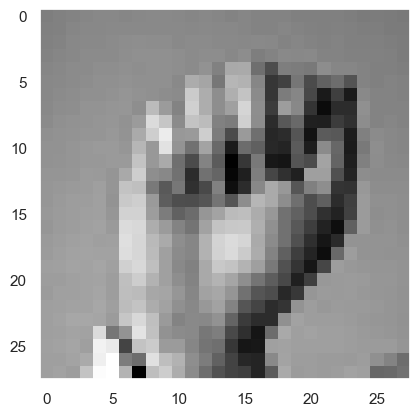

Label of this image:  T


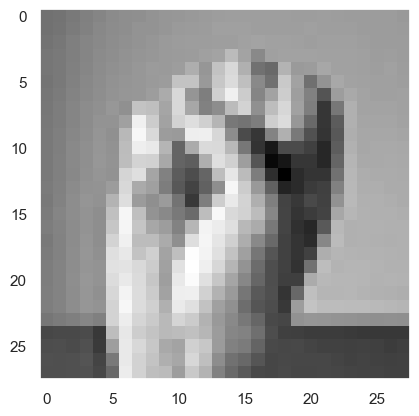

In [17]:
# Show some images of X_train
print('Label of this image: ', class_names[y_train[89]])
plt.imshow(X_train[89,:], cmap='gray')
plt.grid(False)
plt.show()

print('Label of this image: ', class_names[y_train[10]])
plt.imshow(X_train[10,:], cmap='gray')
plt.grid(False)
plt.show()

After checking some images and their labels, some labels and their according images are not consistent. Particularly, labels with value larger than 8 are inconsistent with their images, hence, these values in the response variable need to be deducted by 1 in order to generate correct labels.


In [18]:
# Modifying values of y_train, y_test and y_val
y_train = y_train.apply(lambda x: x - 1 if x > 8 else x)
y_test = y_test.apply(lambda x: x - 1 if x > 8 else x)
y_val = y_val.apply(lambda x: x - 1 if x > 8 else x)

In [19]:
# List of values of response variable after modifying
print("List of values of y_train after modifying: \n")
print(list(y_train.sort_values().unique()))
print('\n')
print("List of values of y_test after modifying: \n")
print(list(y_test.sort_values().unique()))
print('\n')
print("List of values of y_val after modifying: \n")
print(list(y_val.sort_values().unique()))

List of values of y_train after modifying: 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 199]


List of values of y_test after modifying: 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


List of values of y_val after modifying: 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Label of this image:  Y


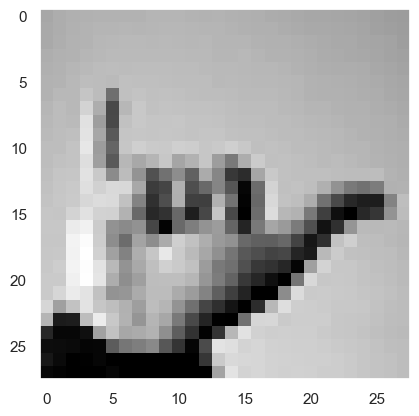

In [20]:
# Check images of X_train again after modifying values of the response variable
print('Label of this image: ', class_names[y_train[26]])
plt.imshow(X_train[26,:], cmap='gray')
plt.grid(False)
plt.show()

In [21]:
# Check an invalid value of y_train
y_train.loc[y_train == 199]

498    199
Name: label, dtype: int64

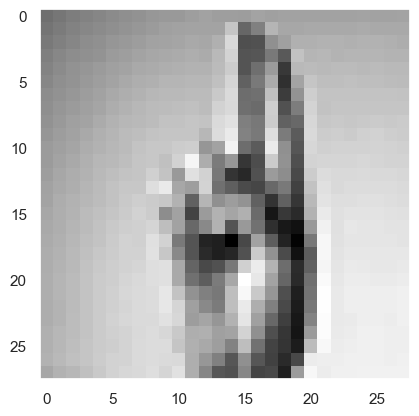

In [22]:
# Check an image of the observation with value of response variable equals to 199
plt.imshow(X_train[498,:], cmap='gray')
plt.grid(False)
plt.show()

There is an observation (its index is 498) with a value of 199 in y_train, this value is out of the range of possible labels, hence it needs to be corrected. After checking its image, the label value of this image should be 19 (letter U) instead of 199.


In [23]:
y_train = y_train.apply(lambda x: 19 if x ==199 else x)

print("List of values of y_train after modifying: \n")
print(list(y_train.sort_values().unique()))
print('\n')
print("List of respective letters (labels of images): \n")
print(class_names)

List of values of y_train after modifying: 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


List of respective letters (labels of images): 

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


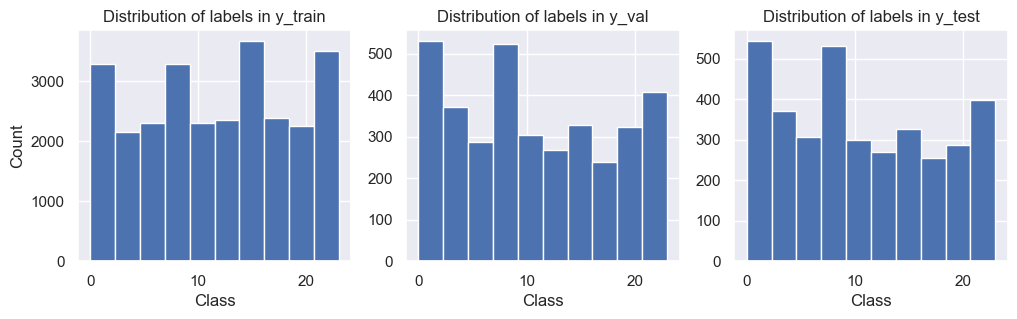

In [24]:
# Checking distribution of lables in y_train, y_test, and y_val
fig, sub = plt.subplots(1, 3)
fig.set_size_inches(12,3)
sub[0].hist(y_train)
sub[0].set_ylabel('Count')
sub[0].set_xlabel('Class')
sub[0].set_title('Distribution of labels in y_train')
sub[1].hist(y_val)
sub[1].set_xlabel('Class')
sub[1].set_title('Distribution of labels in y_val')
sub[2].hist(y_test)
sub[2].set_xlabel('Class')
sub[2].set_title('Distribution of labels in y_test')
plt.show()

## 2. Build a baseline model


For a baseline model, a densely connected model with Stochastic Gradient Descent optimizer is built, its learning rate is 0.01 by default, batch size is 32 and the number of epochs are 30. In this network, there is 3 hidden layers. The first hidden layer contains 64 neurons and uses Elu activation function. The second hidden layer contains 32 neurons and uses Elu activation function. The third hidden layer contains 16 neurons and uses Elu activation function. The output layer contains 24 neurons (since there are 24 possible outcomes of labels) and uses Softmax activation function. The loss function is Sparse categorical crossentropy since labels are encoded as integers from 0 to 23.


In [25]:
# Build a baseline model
actfn_bs = "elu"
optimizer_bs = keras.optimizers.SGD
learningrate_bs = 0.01
batch_size_bs = 32
n_epochs_bs = 30

model_bs = keras.models.Sequential()
model_bs.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
model_bs.add(keras.layers.Dense(64, activation = actfn_bs))
model_bs.add(keras.layers.Dense(32, activation = actfn_bs))
model_bs.add(keras.layers.Dense(16, activation = actfn_bs))
model_bs.add(keras.layers.Dense(24, activation = "softmax"))
model_bs.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs), 
                 metrics=["accuracy"])
history_bs = model_bs.fit(X_train, y_train, epochs=n_epochs_bs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 1s 858us/step - loss: 2.7980 - accuracy: 0.1747 - val_loss: 2.4408 - val_accuracy: 0.2903
Epoch 2/30
858/858 [==============================] - 1s 739us/step - loss: 2.0829 - accuracy: 0.3522 - val_loss: 2.0454 - val_accuracy: 0.3291
Epoch 3/30
858/858 [==============================] - 1s 746us/step - loss: 1.6300 - accuracy: 0.4784 - val_loss: 1.6585 - val_accuracy: 0.4755
Epoch 4/30
858/858 [==============================] - 1s 770us/step - loss: 1.3385 - accuracy: 0.5638 - val_loss: 1.4125 - val_accuracy: 0.5468
Epoch 5/30
858/858 [==============================] - 1s 749us/step - loss: 1.1382 - accuracy: 0.6284 - val_loss: 1.4723 - val_accuracy: 0.5011
Epoch 6/30
858/858 [==============================] - 1s 740us/step - loss: 0.9906 - accuracy: 0.6737 - val_loss: 1.3013 - val_accuracy: 0.5965
Epoch 7/30
858/858 [==============================] - 1s 746us/step - loss: 0.8793 - accuracy: 0.7144 - val_loss: 1.2108 - val_accuracy:

In [26]:
model_bs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 24)                408       
                                                                 
Total params: 53256 (208.03 KB)
Trainable params: 53256 (208.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


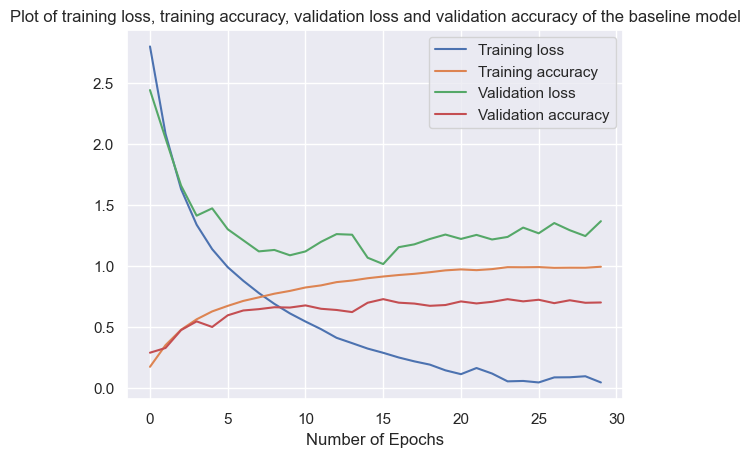

In [27]:
pd.DataFrame(history_bs.history).plot()
plt.xlabel("Number of Epochs")
plt.title("Plot of training loss, training accuracy, validation loss and validation accuracy of the baseline model")
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
plt.show()

According to the plot of training loss, training accuracy, validation loss and validation accuracy of the baseline model above, the training accuracy and validation accuracy of this baseline model converge after 20 epochs. However, the difference between training loss and validation loss, as well as training accuracy and validation accuracy are quite large, which can indicate that this baseline model can be overfitting. For example, after epoch 30, the training accuracy is 0.9942 while the validation accuracy is only 0.7016, hence the gap between these two values is about 0.3.


## 3. Train and optimize a Densely connected and a Convolutional neural network model


In training and optimizing process, there are some hyperparameters that need to be tuned in order to find the optimized model which are the activation function ('actfn' list including Elu, Leaky Relu and Selu activation functions), the optimizer ('optimizer' list including Stochastic Gradient Descent, Adam, and Nadam optimizer) and its learning rate ('learningrate' list containing values of 0.01 and 0.001). These hyperparameters are used for optimizing both the Densely connected model and the Convolutional neural network (CNN) model. Early stopping is also defined with patience of 5, and monitored by validation loss values. Early stopping is used to prevent models from overfitting since the baseline model raises a signal of overfitting problem.


In [28]:
learningrate = [0.01, 0.001]
optimizer = [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.Nadam]
actfn = ['elu', 'LeakyReLU', 'selu']
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

### 3.1 Train and optimize a Densely connected model


The densely connect model is built with 1 Flatten layer for input data, three hidden layers with size of 64, 32, and 16 respectively, and 1 Dense layer including 24 neurons for the output. The used loss function is Sparse categorical crossentropy since labels are encoding as integers from 0 to 23.


In [29]:
def model_dense(hiddensizes, actfn, optimizer, learningrate = 0):
    model_dense = keras.models.Sequential()
    model_dense.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
    for n in hiddensizes:
        model_dense.add(keras.layers.Dense(n, activation = actfn))
    model_dense.add(keras.layers.Dense(24, activation = "softmax"))
    model_dense.compile(loss="sparse_categorical_crossentropy", 
                        optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model_dense

In [30]:
def build_dense(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

Epoch 1/50
858/858 [==============================] - 1s 828us/step - loss: 2.7661 - accuracy: 0.1902 - val_loss: 2.3005 - val_accuracy: 0.3112
Epoch 2/50
858/858 [==============================] - 1s 729us/step - loss: 1.9200 - accuracy: 0.4001 - val_loss: 2.1646 - val_accuracy: 0.3171
Epoch 3/50
858/858 [==============================] - 1s 731us/step - loss: 1.5080 - accuracy: 0.5117 - val_loss: 1.9403 - val_accuracy: 0.3795
Epoch 4/50
858/858 [==============================] - 1s 734us/step - loss: 1.2556 - accuracy: 0.5914 - val_loss: 1.3285 - val_accuracy: 0.5839
Epoch 5/50
858/858 [==============================] - 1s 736us/step - loss: 1.0645 - accuracy: 0.6498 - val_loss: 1.4512 - val_accuracy: 0.5382
Epoch 6/50
858/858 [==============================] - 1s 730us/step - loss: 0.9306 - accuracy: 0.6985 - val_loss: 1.4258 - val_accuracy: 0.5535
Epoch 7/50
858/858 [==============================] - 1s 733us/step - loss: 0.8251 - accuracy: 0.7333 - val_loss: 1.1706 - val_accuracy:

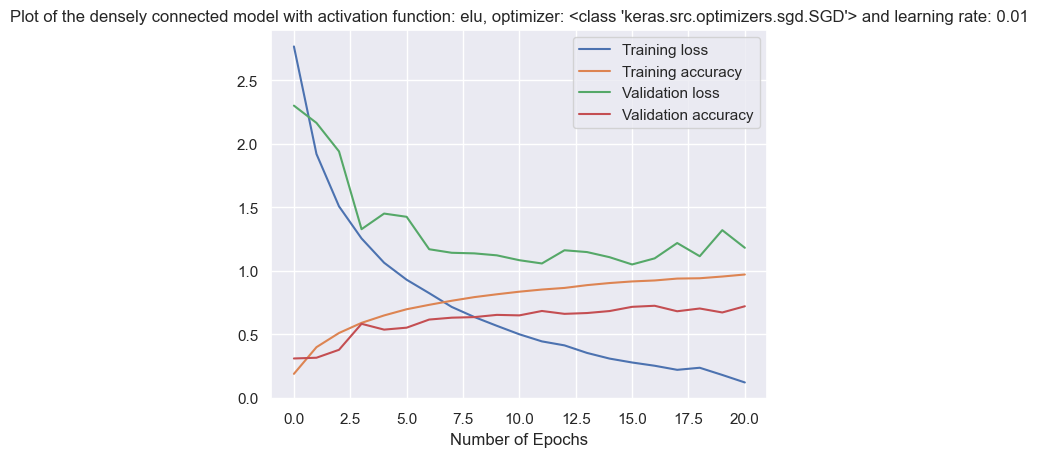

Epoch 1/50
858/858 [==============================] - 1s 801us/step - loss: 3.0261 - accuracy: 0.1333 - val_loss: 2.7956 - val_accuracy: 0.2153
Epoch 2/50
858/858 [==============================] - 1s 751us/step - loss: 2.2052 - accuracy: 0.3248 - val_loss: 2.2232 - val_accuracy: 0.2850
Epoch 3/50
858/858 [==============================] - 1s 839us/step - loss: 1.6381 - accuracy: 0.4717 - val_loss: 1.9406 - val_accuracy: 0.3820
Epoch 4/50
858/858 [==============================] - 1s 700us/step - loss: 1.3393 - accuracy: 0.5646 - val_loss: 1.4907 - val_accuracy: 0.5259
Epoch 5/50
858/858 [==============================] - 1s 705us/step - loss: 1.1475 - accuracy: 0.6226 - val_loss: 1.6763 - val_accuracy: 0.4763
Epoch 6/50
858/858 [==============================] - 1s 708us/step - loss: 0.9973 - accuracy: 0.6697 - val_loss: 1.4684 - val_accuracy: 0.5326
Epoch 7/50
858/858 [==============================] - 1s 746us/step - loss: 0.8813 - accuracy: 0.7082 - val_loss: 1.3800 - val_accuracy:

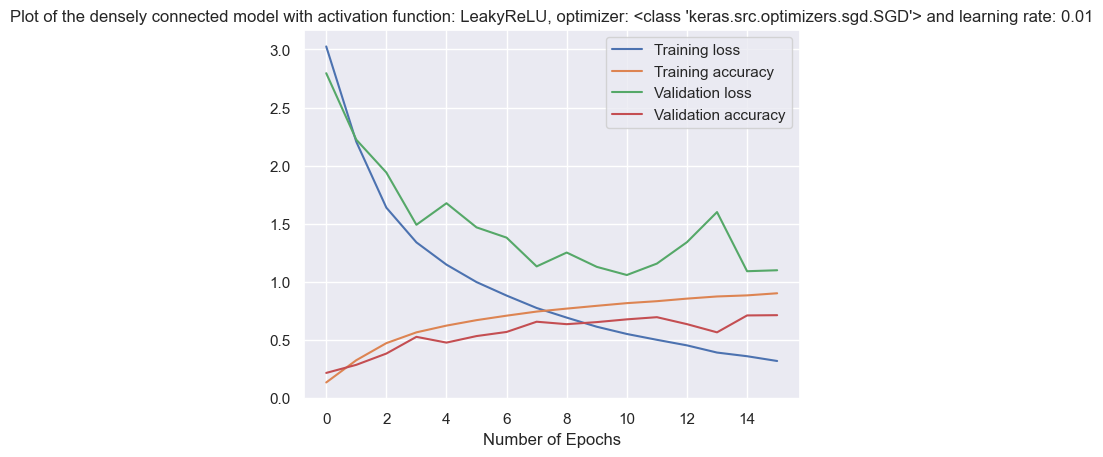

Epoch 1/50
858/858 [==============================] - 1s 841us/step - loss: 2.4381 - accuracy: 0.2684 - val_loss: 1.9159 - val_accuracy: 0.4155
Epoch 2/50
858/858 [==============================] - 1s 751us/step - loss: 1.5901 - accuracy: 0.4985 - val_loss: 1.7512 - val_accuracy: 0.4579
Epoch 3/50
858/858 [==============================] - 1s 767us/step - loss: 1.2374 - accuracy: 0.6005 - val_loss: 1.5866 - val_accuracy: 0.5137
Epoch 4/50
858/858 [==============================] - 1s 753us/step - loss: 1.0165 - accuracy: 0.6677 - val_loss: 1.3462 - val_accuracy: 0.5764
Epoch 5/50
858/858 [==============================] - 1s 752us/step - loss: 0.8566 - accuracy: 0.7194 - val_loss: 1.2631 - val_accuracy: 0.6269
Epoch 6/50
858/858 [==============================] - 1s 762us/step - loss: 0.7275 - accuracy: 0.7630 - val_loss: 1.3310 - val_accuracy: 0.5856
Epoch 7/50
858/858 [==============================] - 1s 746us/step - loss: 0.6474 - accuracy: 0.7910 - val_loss: 1.1751 - val_accuracy:

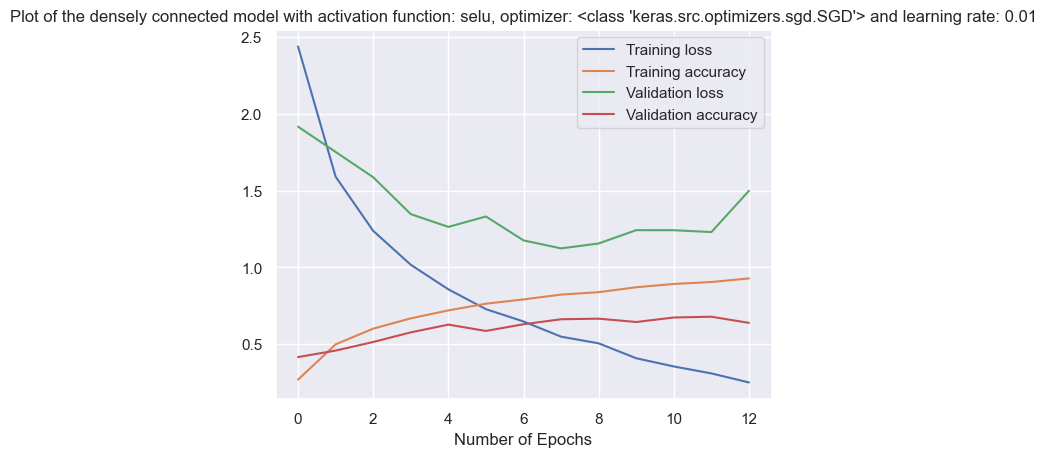

Epoch 1/50
858/858 [==============================] - 1s 984us/step - loss: 2.3659 - accuracy: 0.2175 - val_loss: 2.0000 - val_accuracy: 0.3212
Epoch 2/50
858/858 [==============================] - 1s 911us/step - loss: 1.6791 - accuracy: 0.3996 - val_loss: 1.9286 - val_accuracy: 0.3477
Epoch 3/50
858/858 [==============================] - 1s 907us/step - loss: 1.4004 - accuracy: 0.4938 - val_loss: 1.8275 - val_accuracy: 0.4197
Epoch 4/50
858/858 [==============================] - 1s 895us/step - loss: 1.2291 - accuracy: 0.5485 - val_loss: 2.0064 - val_accuracy: 0.4247
Epoch 5/50
858/858 [==============================] - 1s 901us/step - loss: 1.1077 - accuracy: 0.5961 - val_loss: 2.1134 - val_accuracy: 0.3999
Epoch 6/50
858/858 [==============================] - 1s 895us/step - loss: 1.0358 - accuracy: 0.6196 - val_loss: 2.0957 - val_accuracy: 0.4565
Epoch 7/50
858/858 [==============================] - 1s 914us/step - loss: 0.9685 - accuracy: 0.6440 - val_loss: 2.0641 - val_accuracy:

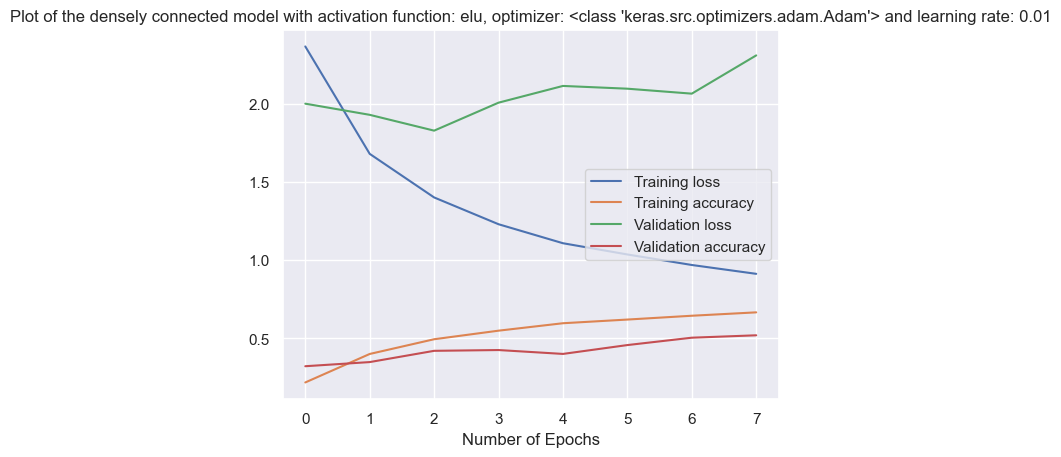

Epoch 1/50
858/858 [==============================] - 1s 977us/step - loss: 2.1070 - accuracy: 0.3185 - val_loss: 1.6425 - val_accuracy: 0.4607
Epoch 2/50
858/858 [==============================] - 1s 890us/step - loss: 1.2510 - accuracy: 0.5673 - val_loss: 1.6724 - val_accuracy: 0.4576
Epoch 3/50
858/858 [==============================] - 1s 888us/step - loss: 0.9498 - accuracy: 0.6708 - val_loss: 1.5141 - val_accuracy: 0.5653
Epoch 4/50
858/858 [==============================] - 1s 881us/step - loss: 0.8471 - accuracy: 0.7092 - val_loss: 1.5442 - val_accuracy: 0.5892
Epoch 5/50
858/858 [==============================] - 1s 890us/step - loss: 0.6952 - accuracy: 0.7624 - val_loss: 1.5099 - val_accuracy: 0.6174
Epoch 6/50
858/858 [==============================] - 1s 895us/step - loss: 0.6650 - accuracy: 0.7810 - val_loss: 1.9942 - val_accuracy: 0.5513
Epoch 7/50
858/858 [==============================] - 1s 891us/step - loss: 0.5845 - accuracy: 0.8091 - val_loss: 1.8570 - val_accuracy:

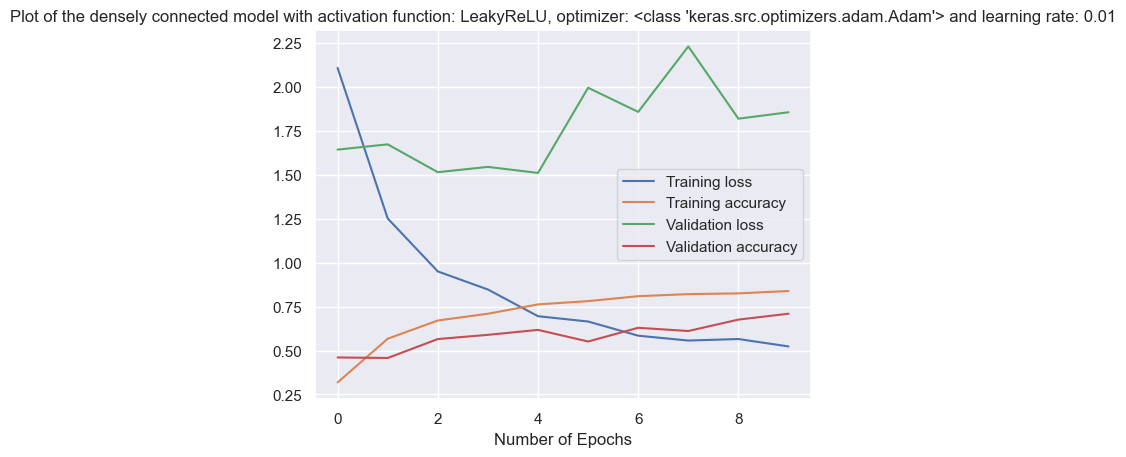

Epoch 1/50
858/858 [==============================] - 1s 990us/step - loss: 2.3501 - accuracy: 0.2478 - val_loss: 2.1882 - val_accuracy: 0.3288
Epoch 2/50
858/858 [==============================] - 1s 918us/step - loss: 1.6318 - accuracy: 0.4384 - val_loss: 1.9760 - val_accuracy: 0.4083
Epoch 3/50
858/858 [==============================] - 1s 898us/step - loss: 1.3623 - accuracy: 0.5258 - val_loss: 1.7889 - val_accuracy: 0.4281
Epoch 4/50
858/858 [==============================] - 1s 895us/step - loss: 1.1874 - accuracy: 0.5788 - val_loss: 1.6849 - val_accuracy: 0.4964
Epoch 5/50
858/858 [==============================] - 1s 902us/step - loss: 1.0650 - accuracy: 0.6194 - val_loss: 1.7123 - val_accuracy: 0.5100
Epoch 6/50
858/858 [==============================] - 1s 931us/step - loss: 0.9643 - accuracy: 0.6539 - val_loss: 1.5844 - val_accuracy: 0.5259
Epoch 7/50
858/858 [==============================] - 1s 929us/step - loss: 0.9074 - accuracy: 0.6710 - val_loss: 1.7776 - val_accuracy:

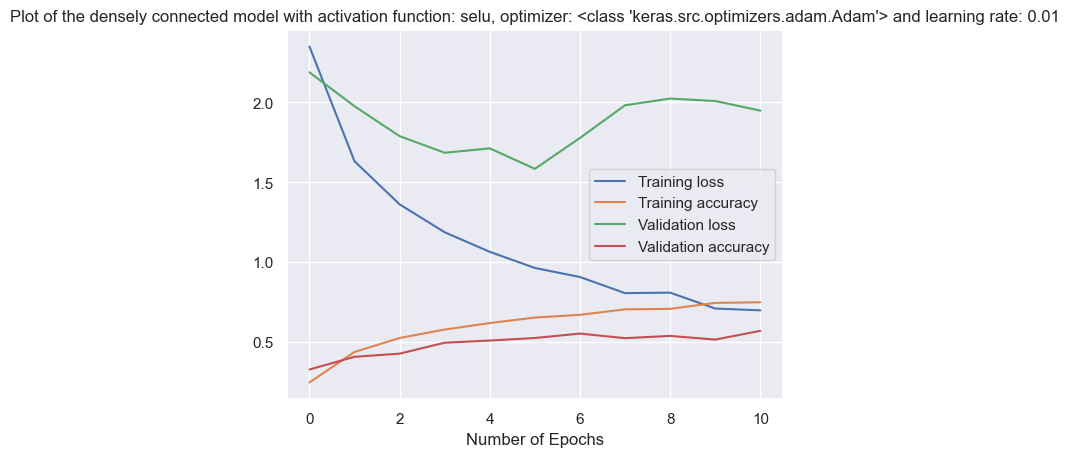

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 1.9594 - accuracy: 0.3521 - val_loss: 1.6744 - val_accuracy: 0.4886
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.0035 - accuracy: 0.6447 - val_loss: 1.4818 - val_accuracy: 0.5876
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 0.7338 - accuracy: 0.7355 - val_loss: 1.7185 - val_accuracy: 0.5706
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.6235 - accuracy: 0.7793 - val_loss: 2.1755 - val_accuracy: 0.5538
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.8193 - val_loss: 1.7807 - val_accuracy: 0.6129
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8480 - val_loss: 1.8405 - val_accuracy: 0.6297
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8575 - val_loss: 2.2871 - val_accuracy: 0.5759


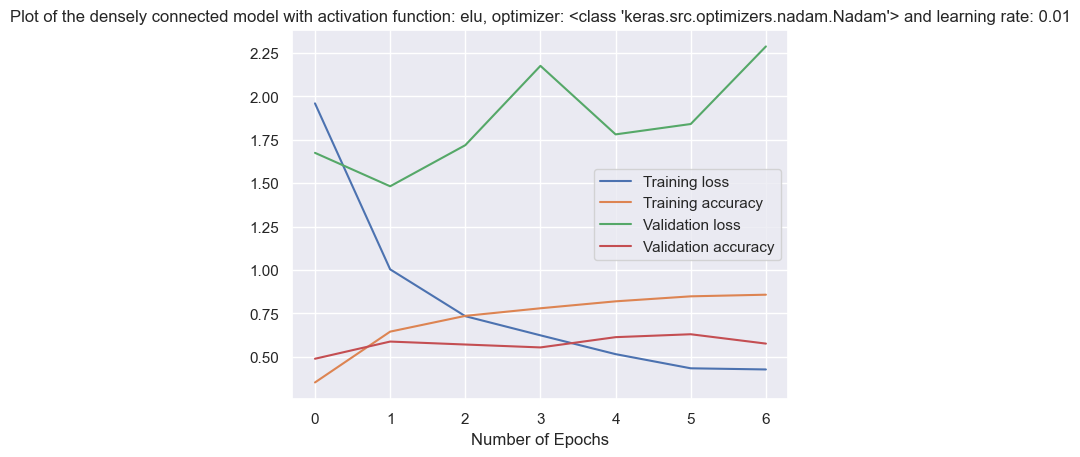

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 2.0223 - accuracy: 0.3437 - val_loss: 1.5306 - val_accuracy: 0.5017
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.0180 - accuracy: 0.6497 - val_loss: 1.4091 - val_accuracy: 0.5965
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 0.7265 - accuracy: 0.7529 - val_loss: 1.6495 - val_accuracy: 0.6138
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5594 - accuracy: 0.8075 - val_loss: 1.6923 - val_accuracy: 0.6375
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5231 - accuracy: 0.8365 - val_loss: 1.5914 - val_accuracy: 0.6645
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.4347 - accuracy: 0.8592 - val_loss: 2.3525 - val_accuracy: 0.6394
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.4015 - accuracy: 0.8735 - val_loss: 1.9007 - val_accuracy: 0.6810


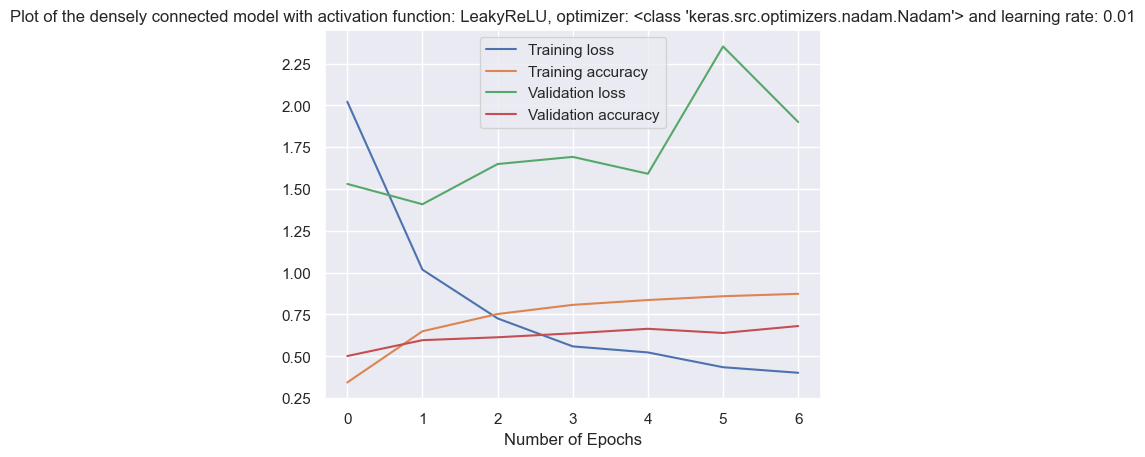

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 2.1494 - accuracy: 0.2932 - val_loss: 1.8321 - val_accuracy: 0.3787
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.2875 - accuracy: 0.5539 - val_loss: 1.5300 - val_accuracy: 0.5025
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 0.9296 - accuracy: 0.6732 - val_loss: 1.5897 - val_accuracy: 0.5407
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.7351 - accuracy: 0.7408 - val_loss: 1.8094 - val_accuracy: 0.5349
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.6217 - accuracy: 0.7783 - val_loss: 1.7623 - val_accuracy: 0.5742
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.8071 - val_loss: 2.0039 - val_accuracy: 0.5694
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.4952 - accuracy: 0.8256 - val_loss: 2.2083 - val_accuracy: 0.5926


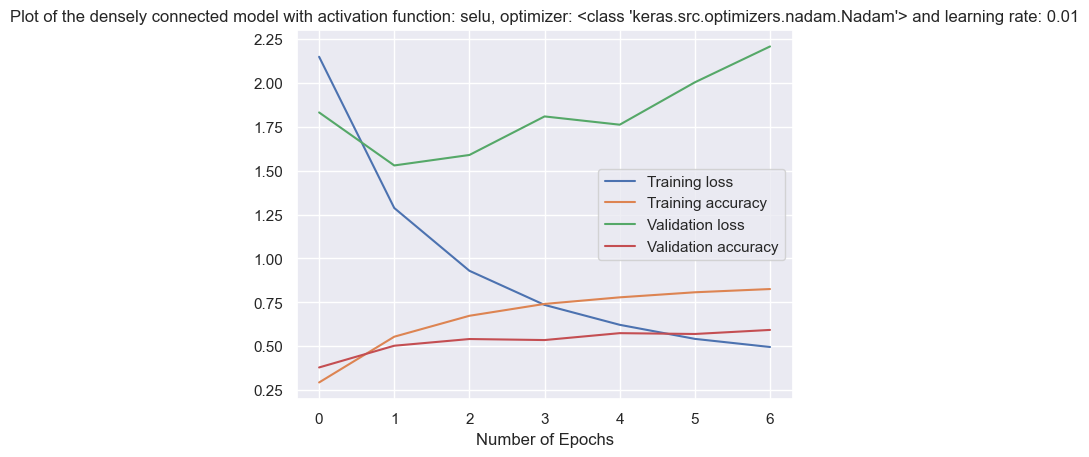

Epoch 1/50
858/858 [==============================] - 1s 836us/step - loss: 3.1387 - accuracy: 0.0767 - val_loss: 3.1048 - val_accuracy: 0.1079
Epoch 2/50
858/858 [==============================] - 1s 743us/step - loss: 3.0370 - accuracy: 0.1552 - val_loss: 3.0046 - val_accuracy: 0.1854
Epoch 3/50
858/858 [==============================] - 1s 749us/step - loss: 2.9299 - accuracy: 0.1958 - val_loss: 2.8906 - val_accuracy: 0.2069
Epoch 4/50
858/858 [==============================] - 1s 741us/step - loss: 2.8162 - accuracy: 0.2249 - val_loss: 2.7822 - val_accuracy: 0.2398
Epoch 5/50
858/858 [==============================] - 1s 781us/step - loss: 2.6974 - accuracy: 0.2466 - val_loss: 2.6789 - val_accuracy: 0.2526
Epoch 6/50
858/858 [==============================] - 1s 736us/step - loss: 2.5809 - accuracy: 0.2743 - val_loss: 2.5700 - val_accuracy: 0.2761
Epoch 7/50
858/858 [==============================] - 1s 734us/step - loss: 2.4664 - accuracy: 0.3045 - val_loss: 2.4651 - val_accuracy:

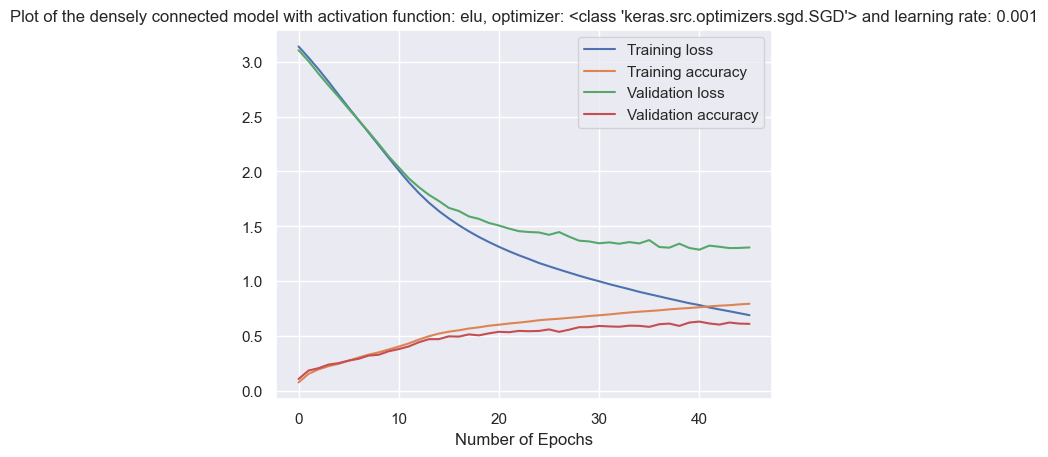

Epoch 1/50
858/858 [==============================] - 1s 800us/step - loss: 3.1720 - accuracy: 0.0490 - val_loss: 3.1717 - val_accuracy: 0.0427
Epoch 2/50
858/858 [==============================] - 1s 709us/step - loss: 3.1354 - accuracy: 0.0706 - val_loss: 3.1392 - val_accuracy: 0.0736
Epoch 3/50
858/858 [==============================] - 1s 708us/step - loss: 3.0999 - accuracy: 0.0831 - val_loss: 3.1047 - val_accuracy: 0.0956
Epoch 4/50
858/858 [==============================] - 1s 702us/step - loss: 3.0592 - accuracy: 0.0992 - val_loss: 3.0636 - val_accuracy: 0.1023
Epoch 5/50
858/858 [==============================] - 1s 715us/step - loss: 3.0082 - accuracy: 0.1190 - val_loss: 3.0136 - val_accuracy: 0.1196
Epoch 6/50
858/858 [==============================] - 1s 699us/step - loss: 2.9445 - accuracy: 0.1339 - val_loss: 2.9489 - val_accuracy: 0.1227
Epoch 7/50
858/858 [==============================] - 1s 698us/step - loss: 2.8708 - accuracy: 0.1524 - val_loss: 2.8747 - val_accuracy:

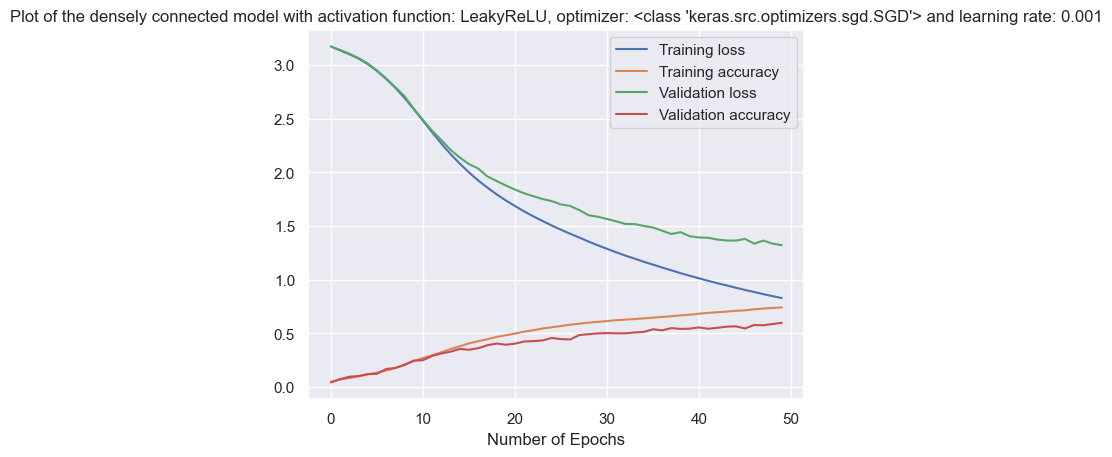

Epoch 1/50
858/858 [==============================] - 1s 828us/step - loss: 3.0242 - accuracy: 0.1139 - val_loss: 2.9138 - val_accuracy: 0.1606
Epoch 2/50
858/858 [==============================] - 1s 745us/step - loss: 2.7270 - accuracy: 0.2485 - val_loss: 2.6675 - val_accuracy: 0.2259
Epoch 3/50
858/858 [==============================] - 1s 744us/step - loss: 2.4836 - accuracy: 0.3344 - val_loss: 2.4550 - val_accuracy: 0.2984
Epoch 4/50
858/858 [==============================] - 1s 748us/step - loss: 2.2723 - accuracy: 0.3891 - val_loss: 2.2873 - val_accuracy: 0.3302
Epoch 5/50
858/858 [==============================] - 1s 751us/step - loss: 2.0979 - accuracy: 0.4275 - val_loss: 2.1366 - val_accuracy: 0.3840
Epoch 6/50
858/858 [==============================] - 1s 749us/step - loss: 1.9497 - accuracy: 0.4641 - val_loss: 2.0301 - val_accuracy: 0.4030
Epoch 7/50
858/858 [==============================] - 1s 747us/step - loss: 1.8226 - accuracy: 0.5030 - val_loss: 1.9336 - val_accuracy:

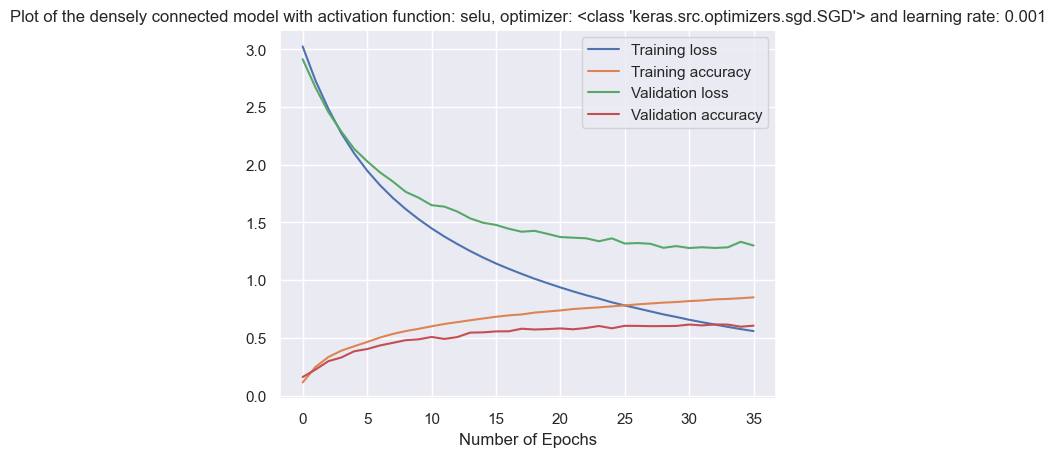

Epoch 1/50
858/858 [==============================] - 1s 991us/step - loss: 1.9733 - accuracy: 0.3790 - val_loss: 1.6701 - val_accuracy: 0.4339
Epoch 2/50
858/858 [==============================] - 1s 894us/step - loss: 1.0966 - accuracy: 0.6365 - val_loss: 1.2783 - val_accuracy: 0.5781
Epoch 3/50
858/858 [==============================] - 1s 895us/step - loss: 0.8077 - accuracy: 0.7282 - val_loss: 1.1614 - val_accuracy: 0.6132
Epoch 4/50
858/858 [==============================] - 1s 894us/step - loss: 0.5744 - accuracy: 0.8088 - val_loss: 1.0251 - val_accuracy: 0.6598
Epoch 5/50
858/858 [==============================] - 1s 896us/step - loss: 0.4381 - accuracy: 0.8556 - val_loss: 1.1079 - val_accuracy: 0.6807
Epoch 6/50
858/858 [==============================] - 1s 908us/step - loss: 0.3308 - accuracy: 0.8912 - val_loss: 1.1551 - val_accuracy: 0.6896
Epoch 7/50
858/858 [==============================] - 1s 899us/step - loss: 0.2444 - accuracy: 0.9225 - val_loss: 1.2326 - val_accuracy:

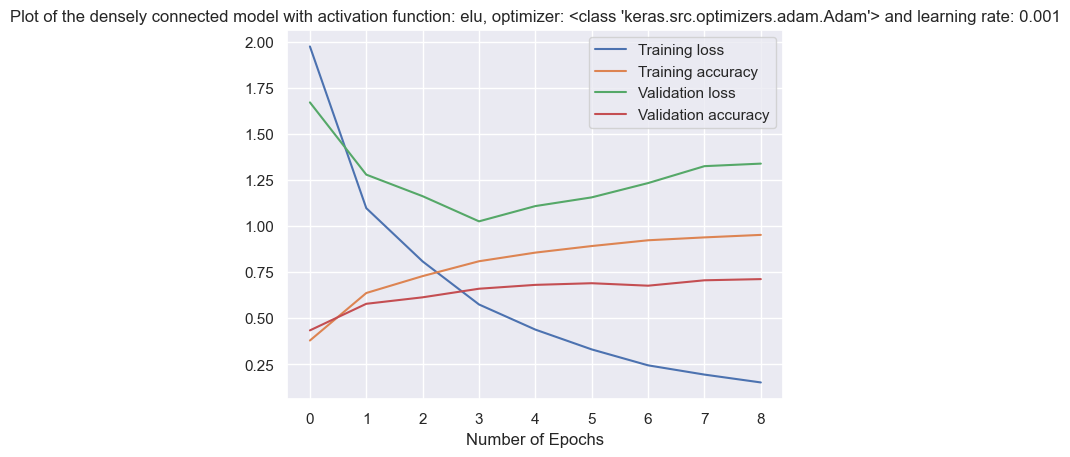

Epoch 1/50
858/858 [==============================] - 1s 953us/step - loss: 2.1439 - accuracy: 0.3219 - val_loss: 1.7830 - val_accuracy: 0.4055
Epoch 2/50
858/858 [==============================] - 1s 872us/step - loss: 1.1885 - accuracy: 0.6099 - val_loss: 1.4069 - val_accuracy: 0.5424
Epoch 3/50
858/858 [==============================] - 1s 873us/step - loss: 0.8717 - accuracy: 0.7118 - val_loss: 1.3099 - val_accuracy: 0.5956
Epoch 4/50
858/858 [==============================] - 1s 865us/step - loss: 0.7014 - accuracy: 0.7627 - val_loss: 1.3346 - val_accuracy: 0.5956
Epoch 5/50
858/858 [==============================] - 1s 867us/step - loss: 0.5499 - accuracy: 0.8162 - val_loss: 1.7056 - val_accuracy: 0.5630
Epoch 6/50
858/858 [==============================] - 1s 867us/step - loss: 0.4480 - accuracy: 0.8507 - val_loss: 1.4289 - val_accuracy: 0.6255
Epoch 7/50
858/858 [==============================] - 1s 870us/step - loss: 0.3654 - accuracy: 0.8775 - val_loss: 1.5608 - val_accuracy:

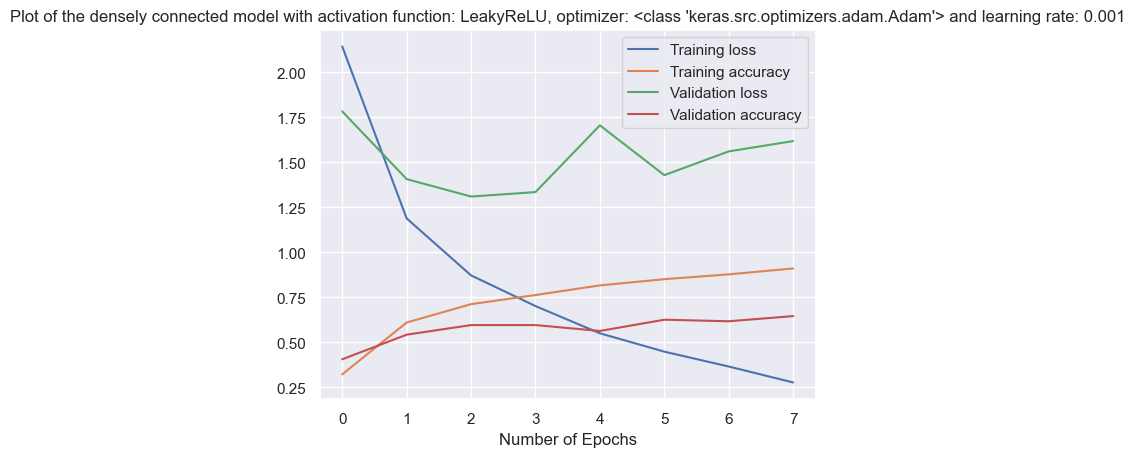

Epoch 1/50
858/858 [==============================] - 1s 991us/step - loss: 2.0997 - accuracy: 0.3674 - val_loss: 1.5423 - val_accuracy: 0.5349
Epoch 2/50
858/858 [==============================] - 1s 908us/step - loss: 1.0914 - accuracy: 0.6467 - val_loss: 1.4045 - val_accuracy: 0.5669
Epoch 3/50
858/858 [==============================] - 1s 908us/step - loss: 0.7345 - accuracy: 0.7630 - val_loss: 1.2062 - val_accuracy: 0.6484
Epoch 4/50
858/858 [==============================] - 1s 909us/step - loss: 0.5145 - accuracy: 0.8359 - val_loss: 1.2125 - val_accuracy: 0.6762
Epoch 5/50
858/858 [==============================] - 1s 910us/step - loss: 0.3586 - accuracy: 0.8846 - val_loss: 1.1641 - val_accuracy: 0.6997
Epoch 6/50
858/858 [==============================] - 1s 915us/step - loss: 0.2650 - accuracy: 0.9162 - val_loss: 1.1945 - val_accuracy: 0.6969
Epoch 7/50
858/858 [==============================] - 1s 921us/step - loss: 0.2064 - accuracy: 0.9329 - val_loss: 1.2542 - val_accuracy:

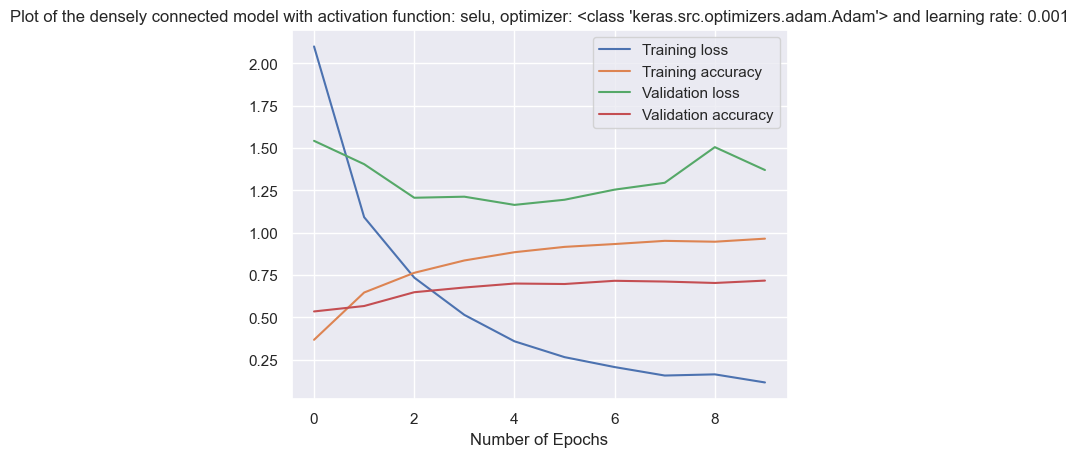

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 1.7987 - accuracy: 0.4261 - val_loss: 1.4823 - val_accuracy: 0.5374
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 0.8830 - accuracy: 0.7085 - val_loss: 1.1665 - val_accuracy: 0.6141
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5586 - accuracy: 0.8192 - val_loss: 1.2056 - val_accuracy: 0.6294
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8810 - val_loss: 1.3145 - val_accuracy: 0.6445
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.2564 - accuracy: 0.9206 - val_loss: 1.2992 - val_accuracy: 0.6877
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.1719 - accuracy: 0.9498 - val_loss: 1.3255 - val_accuracy: 0.6969
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.1281 - accuracy: 0.9644 - val_loss: 1.5559 - val_accuracy: 0.6813


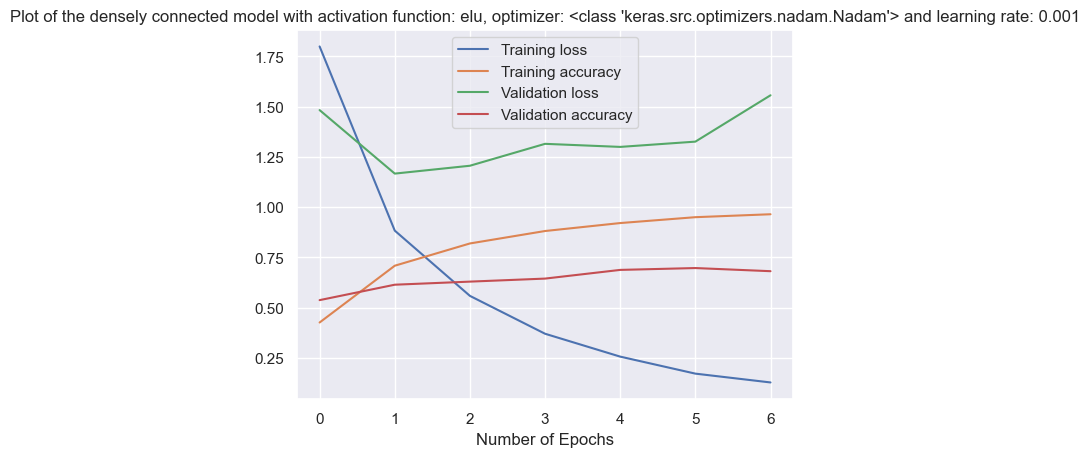

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 1.9215 - accuracy: 0.3882 - val_loss: 1.6436 - val_accuracy: 0.4732
Epoch 2/50
858/858 [==============================] - 1s 986us/step - loss: 1.0526 - accuracy: 0.6496 - val_loss: 1.3244 - val_accuracy: 0.5650
Epoch 3/50
858/858 [==============================] - 1s 992us/step - loss: 0.7477 - accuracy: 0.7508 - val_loss: 1.1912 - val_accuracy: 0.6213
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.8224 - val_loss: 1.1596 - val_accuracy: 0.6740
Epoch 5/50
858/858 [==============================] - 1s 999us/step - loss: 0.4007 - accuracy: 0.8747 - val_loss: 1.2400 - val_accuracy: 0.6735
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.2898 - accuracy: 0.9121 - val_loss: 1.3198 - val_accuracy: 0.6631
Epoch 7/50
858/858 [==============================] - 1s 997us/step - loss: 0.2186 - accuracy: 0.9360 - val_loss: 1.3777 - val_accuracy: 0.688

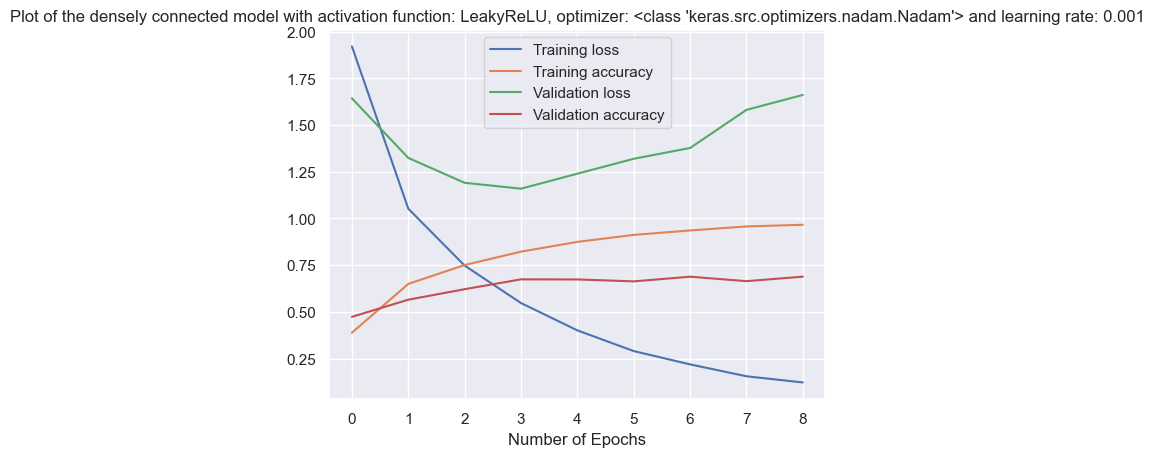

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 1.7267 - accuracy: 0.4629 - val_loss: 1.5594 - val_accuracy: 0.5145
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 0.8498 - accuracy: 0.7182 - val_loss: 1.2807 - val_accuracy: 0.6124
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.8245 - val_loss: 1.1803 - val_accuracy: 0.6640
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8912 - val_loss: 1.2432 - val_accuracy: 0.6827
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.2250 - accuracy: 0.9296 - val_loss: 1.6500 - val_accuracy: 0.6464
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.1437 - accuracy: 0.9598 - val_loss: 1.6033 - val_accuracy: 0.6768
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.9694 - val_loss: 1.6744 - val_accuracy: 0.6871
Epoch 

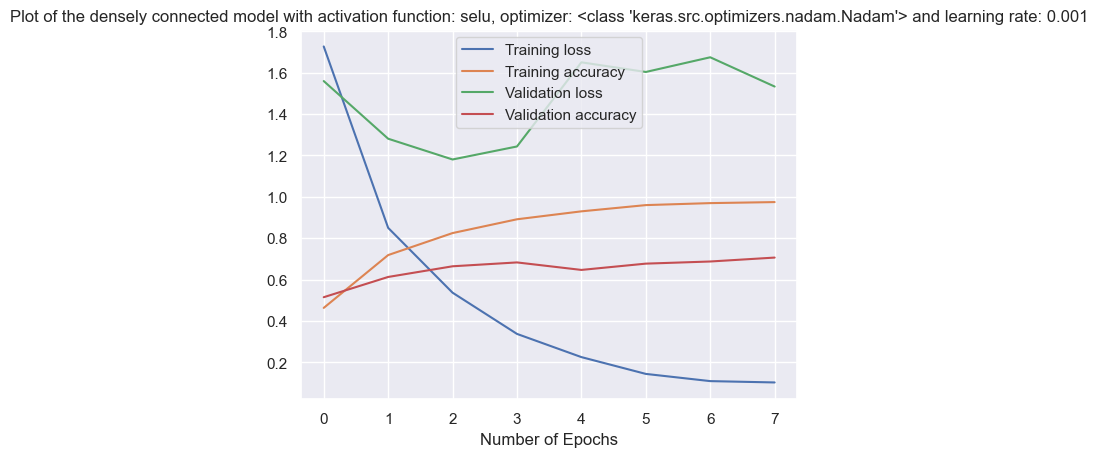

In [31]:
hiddensizes = [64,32,16]
batch_size = 32
n_epochs = 50

res_dense = []
for i in learningrate:
    for o in optimizer:
        for a in actfn:
            max_val_acc_dense, history_dense, model_d = build_dense(hiddensizes, a, o, i, n_epochs, batch_size, 
                                                                    further_callbacks = [])
            pd.DataFrame(history_dense.history).plot()
            plt.xlabel("Number of Epochs")
            plt.title(f'Plot of the densely connected model with activation function: {a}, optimizer: {o} and learning rate: {i}')
            plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
            plt.show()
            res_dense += [[i, o, a, max_val_acc_dense]]


In [32]:
lr = []
opt = []
act = []
val_acc = []
for i in range(0, len(res_dense)):
    lr.append(res_dense[i][0])
    opt.append(res_dense[i][1])
    act.append(res_dense[i][2])
    val_acc.append(res_dense[i][3])

print('Table of the maximum validation accuracy for each combination of activation, optimizer and learning rate for the densely connected model: \n')
val_dense = pd.DataFrame({'Learning rate': lr, 'Optimizer': opt, 'Activation function': act, 
                          'Max validation accuracy': val_acc})
val_dense = val_dense.sort_values('Max validation accuracy')
val_dense

Table of the maximum validation accuracy for each combination of activation, optimizer and learning rate for the densely connected model: 



,Learning rate,Optimizer,Activation function,Max validation accuracy
3,0.010,<class 'keras.src.optimizers.adam.Adam'>,elu,0.518963
5,0.010,<class 'keras.src.optimizers.adam.Adam'>,selu,0.570831
8,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,selu,0.592582
10,0.001,<class 'keras.src.optimizers.sgd.SGD'>,LeakyReLU,0.598438
11,0.001,<class 'keras.src.optimizers.sgd.SGD'>,selu,0.616007
6,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,elu,0.629671
9,0.001,<class 'keras.src.optimizers.sgd.SGD'>,elu,0.631344
13,0.001,<class 'keras.src.optimizers.adam.Adam'>,LeakyReLU,0.645566
2,0.010,<class 'keras.src.optimizers.sgd.SGD'>,selu,0.678193
7,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,LeakyReLU,0.680982


In general, the maximum validation accuracy scores of these densely connected models range from about 0.51 to 0.73. Additionally, all of these densely connected models can be overfitting since the differences between their training accuracy and their validation accuracy are quite large (from around 0.2 to 0.3). According to the table of the maximum validation accuracy for each combination of activation function, optimizer and learning rate above, the model which has the highest validation accuracy is a densely connected model with Elu activation function, its optimizer is Stochastic Gradient Descent with learning rate of 0.01. The maximum validation accuracy of this model is about 0.73. However, according to this model's plot of performance, its training accuracy is about 0.925, hence there is a large difference between its training accuracy and its validation accuracy (nearly 0.2), which can indicate that this model can be overfitting. Therefore, some methods such as Regularization, Weight initialization and Dropout regularization are used to mitigate this overfitting problem for this best densely connected model.


#### Apply Regularization methods on the best densely connected model


In [33]:
# Try using Regularization for the best densely connected model
model_dense_reg = keras.models.Sequential()
model_dense_reg.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
for n in hiddensizes:
    model_dense_reg.add(keras.layers.Dense(n, activation = 'elu', kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
model_dense_reg.add(keras.layers.Dense(24, activation = "softmax"))
model_dense_reg.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
history_dense_reg = model_dense_reg.fit(X_train, y_train, epochs=50, callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 1s 883us/step - loss: 4.4097 - accuracy: 0.1903 - val_loss: 3.8642 - val_accuracy: 0.2566
Epoch 2/50
858/858 [==============================] - 1s 767us/step - loss: 3.3336 - accuracy: 0.3661 - val_loss: 3.1823 - val_accuracy: 0.3160
Epoch 3/50
858/858 [==============================] - 1s 755us/step - loss: 2.7651 - accuracy: 0.4489 - val_loss: 2.7213 - val_accuracy: 0.4311
Epoch 4/50
858/858 [==============================] - 1s 746us/step - loss: 2.4386 - accuracy: 0.5041 - val_loss: 2.3811 - val_accuracy: 0.5337
Epoch 5/50
858/858 [==============================] - 1s 742us/step - loss: 2.2347 - accuracy: 0.5324 - val_loss: 2.4190 - val_accuracy: 0.4314
Epoch 6/50
858/858 [==============================] - 1s 745us/step - loss: 2.0956 - accuracy: 0.5528 - val_loss: 2.2952 - val_accuracy: 0.4939
Epoch 7/50
858/858 [==============================] - 1s 744us/step - loss: 1.9923 - accuracy: 0.5703 - val_loss: 2.2566 - val_accuracy:

According to the performance of this best densely connected model after using l2 Regularizer, after epoch 22, its training accuracy is about 0.6532 and its validation accuracy is about 0.524. The difference between these two values is about 0.13. Hence, this method of l2 Regulization just can slightly reduce the overfitting problem of this model since the gap between these two values of this model before apply l2 regularization is about 0.2. However, the validation accuracy of this model after applying l2 Regularization is much lower than its original validation accuracy since the model's validation accuracy before applying this l2 regularization method is about 0.73.


In [34]:
# Try using Weight Initialization for the best densely connect model
model_dense_wi = keras.models.Sequential()
model_dense_wi.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
model_dense_wi.add(keras.layers.Dense(64, activation = 'elu', kernel_initializer = 'he_normal'))
for n in hiddensizes[1:]:
    model_dense_wi.add(keras.layers.Dense(n, activation = 'selu'))
model_dense_wi.add(keras.layers.Dense(24, activation = "softmax"))
model_dense_wi.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
history_dense_wi = model_dense_wi.fit(X_train, y_train, epochs=50, callbacks = early_stopping_cb, validation_data=(X_val, y_val))
max_val_acc_dense_wi = np.max(history_dense_wi.history['val_accuracy'])

Epoch 1/50
858/858 [==============================] - 1s 851us/step - loss: 2.4767 - accuracy: 0.2469 - val_loss: 2.0876 - val_accuracy: 0.3001
Epoch 2/50
858/858 [==============================] - 1s 747us/step - loss: 1.6745 - accuracy: 0.4679 - val_loss: 1.7099 - val_accuracy: 0.4674
Epoch 3/50
858/858 [==============================] - 1s 742us/step - loss: 1.2962 - accuracy: 0.5767 - val_loss: 1.4403 - val_accuracy: 0.5198
Epoch 4/50
858/858 [==============================] - 1s 760us/step - loss: 1.0809 - accuracy: 0.6441 - val_loss: 1.3226 - val_accuracy: 0.5563
Epoch 5/50
858/858 [==============================] - 1s 747us/step - loss: 0.9198 - accuracy: 0.6972 - val_loss: 1.3666 - val_accuracy: 0.5555
Epoch 6/50
858/858 [==============================] - 1s 752us/step - loss: 0.8026 - accuracy: 0.7372 - val_loss: 1.3986 - val_accuracy: 0.5717
Epoch 7/50
858/858 [==============================] - 1s 751us/step - loss: 0.7075 - accuracy: 0.7696 - val_loss: 1.1941 - val_accuracy:

According to the performance of this best densely connected model after using Weight initialization method, after epoch 15, this model converges with its training accuracy is about 0.9289 and its validation accuracy is about 0.7022. The difference between these two values is about 0.23. Hence, this method of Weight initialization does not reduce the gap between the training accuracy and the validation accuracy of the model since the difference between these two values before applying Weight initialization is about 0.2.


In [35]:
# Try using Dropout Regularization for the best densely connect model
model_dense_dr = keras.models.Sequential()
model_dense_dr.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
for n in hiddensizes:
    model_dense_dr.add(keras.layers.Dense(n, activation = 'elu'))
    model_dense_dr.add(keras.layers.Dropout (0.05))
model_dense_dr.add(keras.layers.Dense(24, activation = "softmax"))
model_dense_dr.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
history_dense_dr = model_dense_dr.fit(X_train, y_train, epochs=50, callbacks = early_stopping_cb, validation_data=(X_val, y_val))
max_val_acc_dense_dr = np.max(history_dense_dr.history['val_accuracy'])

Epoch 1/50
858/858 [==============================] - 1s 894us/step - loss: 2.9185 - accuracy: 0.1554 - val_loss: 2.6923 - val_accuracy: 0.2181
Epoch 2/50
858/858 [==============================] - 1s 801us/step - loss: 2.2142 - accuracy: 0.3331 - val_loss: 1.9673 - val_accuracy: 0.3879
Epoch 3/50
858/858 [==============================] - 1s 837us/step - loss: 1.7477 - accuracy: 0.4443 - val_loss: 1.7352 - val_accuracy: 0.4526
Epoch 4/50
858/858 [==============================] - 1s 809us/step - loss: 1.4906 - accuracy: 0.5182 - val_loss: 1.4266 - val_accuracy: 0.5694
Epoch 5/50
858/858 [==============================] - 1s 822us/step - loss: 1.3086 - accuracy: 0.5742 - val_loss: 1.3576 - val_accuracy: 0.5904
Epoch 6/50
858/858 [==============================] - 1s 814us/step - loss: 1.1739 - accuracy: 0.6153 - val_loss: 1.3680 - val_accuracy: 0.5669
Epoch 7/50
858/858 [==============================] - 1s 848us/step - loss: 1.0610 - accuracy: 0.6532 - val_loss: 1.2966 - val_accuracy:

According to the performance of this best densely connected model after using Dropout regularization method, after epoch 24, this model converges with its training accuracy is about 0.8912 and its validation accuracy is about 0.7292. The difference between these two values is about 0.16. Hence, this method of Dropout regulation also just slightly reduce the gap between the training accuracy and the validation accuracy of the model since the gap between these two values of this model before apply Dropout regularization is about 0.2, but it does not improve the validation accuracy much.


### 3.2 Train and optimize a Convolutional Neural Network (CNN) model


The CNN model is built with Convolutional layers 3x3, strides equal to 1, Max Pooling layers 2x2, 1 Flatten layer, and 1 Dense layer including 24 neurons for the output. The used loss function is Sparse categorical crossentropy since labels are encoding as integers (from 0 to 23). Early stopping is also defined with patience of 5, and monitored by validation loss values. Early stopping is used to prevent model from overfitting.


Epoch 1/50
858/858 [==============================] - 16s 18ms/step - loss: 2.8795 - accuracy: 0.1839 - val_loss: 2.1314 - val_accuracy: 0.3726
Epoch 2/50
858/858 [==============================] - 15s 18ms/step - loss: 1.2141 - accuracy: 0.6392 - val_loss: 1.0068 - val_accuracy: 0.6779
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 0.5182 - accuracy: 0.8397 - val_loss: 0.6327 - val_accuracy: 0.7869
Epoch 4/50
858/858 [==============================] - 16s 18ms/step - loss: 0.2408 - accuracy: 0.9309 - val_loss: 0.5305 - val_accuracy: 0.8391
Epoch 5/50
858/858 [==============================] - 15s 18ms/step - loss: 0.1165 - accuracy: 0.9722 - val_loss: 0.4416 - val_accuracy: 0.8631
Epoch 6/50
858/858 [==============================] - 15s 18ms/step - loss: 0.0585 - accuracy: 0.9910 - val_loss: 0.4339 - val_accuracy: 0.8678
Epoch 7/50
858/858 [==============================] - 15s 18ms/step - loss: 0.0309 - accuracy: 0.9975 - val_loss: 0.4265 - val_accuracy:

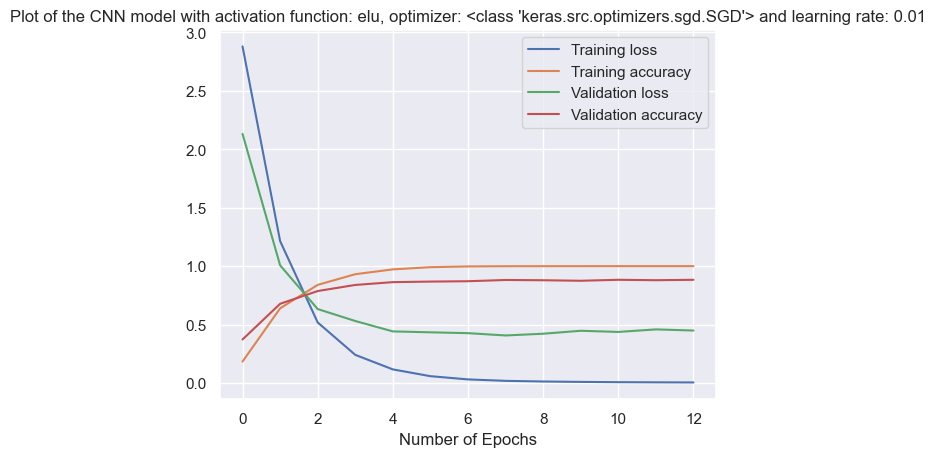

Epoch 1/50
858/858 [==============================] - 14s 16ms/step - loss: 3.1578 - accuracy: 0.0720 - val_loss: 3.1513 - val_accuracy: 0.0485
Epoch 2/50
858/858 [==============================] - 14s 16ms/step - loss: 2.2905 - accuracy: 0.3265 - val_loss: 1.6336 - val_accuracy: 0.4808
Epoch 3/50
858/858 [==============================] - 14s 16ms/step - loss: 1.0229 - accuracy: 0.6828 - val_loss: 0.9674 - val_accuracy: 0.6609
Epoch 4/50
858/858 [==============================] - 14s 17ms/step - loss: 0.5568 - accuracy: 0.8263 - val_loss: 0.7815 - val_accuracy: 0.7423
Epoch 5/50
858/858 [==============================] - 14s 16ms/step - loss: 0.3191 - accuracy: 0.9027 - val_loss: 0.7051 - val_accuracy: 0.7613
Epoch 6/50
858/858 [==============================] - 14s 16ms/step - loss: 0.1706 - accuracy: 0.9516 - val_loss: 0.6253 - val_accuracy: 0.8062
Epoch 7/50
858/858 [==============================] - 14s 16ms/step - loss: 0.0908 - accuracy: 0.9794 - val_loss: 0.6540 - val_accuracy:

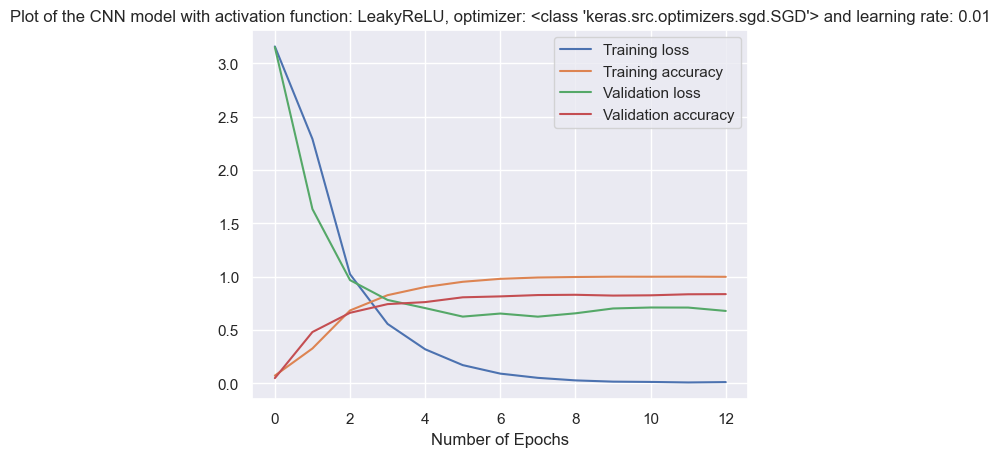

Epoch 1/50
858/858 [==============================] - 16s 18ms/step - loss: 1.9353 - accuracy: 0.4421 - val_loss: 1.1185 - val_accuracy: 0.6266
Epoch 2/50
858/858 [==============================] - 16s 19ms/step - loss: 0.5696 - accuracy: 0.8263 - val_loss: 0.6801 - val_accuracy: 0.7828
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 0.2442 - accuracy: 0.9330 - val_loss: 0.4633 - val_accuracy: 0.8475
Epoch 4/50
858/858 [==============================] - 16s 18ms/step - loss: 0.1092 - accuracy: 0.9783 - val_loss: 0.4190 - val_accuracy: 0.8639
Epoch 5/50
858/858 [==============================] - 16s 18ms/step - loss: 0.0548 - accuracy: 0.9941 - val_loss: 0.3846 - val_accuracy: 0.8765
Epoch 6/50
858/858 [==============================] - 16s 18ms/step - loss: 0.0311 - accuracy: 0.9981 - val_loss: 0.4136 - val_accuracy: 0.8834
Epoch 7/50
858/858 [==============================] - 16s 19ms/step - loss: 0.0195 - accuracy: 0.9995 - val_loss: 0.4007 - val_accuracy:

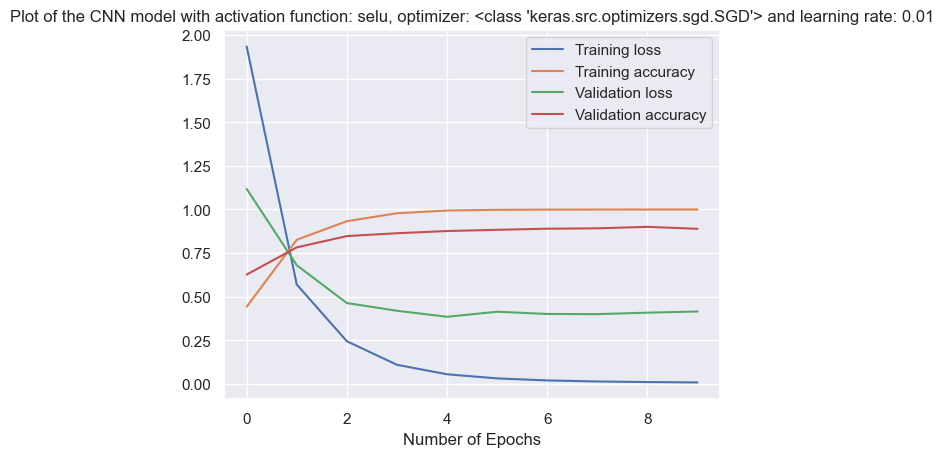

Epoch 1/50
858/858 [==============================] - 17s 19ms/step - loss: 1.3477 - accuracy: 0.8103 - val_loss: 3.1771 - val_accuracy: 0.8779
Epoch 2/50
858/858 [==============================] - 16s 19ms/step - loss: 0.2401 - accuracy: 0.9822 - val_loss: 7.7578 - val_accuracy: 0.8349
Epoch 3/50
858/858 [==============================] - 16s 19ms/step - loss: 1.0093 - accuracy: 0.9658 - val_loss: 13.6655 - val_accuracy: 0.8330
Epoch 4/50
858/858 [==============================] - 16s 19ms/step - loss: 1.0300 - accuracy: 0.9786 - val_loss: 20.6149 - val_accuracy: 0.8611
Epoch 5/50
858/858 [==============================] - 17s 19ms/step - loss: 0.6397 - accuracy: 0.9903 - val_loss: 31.1856 - val_accuracy: 0.8862
Epoch 6/50
858/858 [==============================] - 16s 19ms/step - loss: 1.6665 - accuracy: 0.9851 - val_loss: 36.6808 - val_accuracy: 0.8745


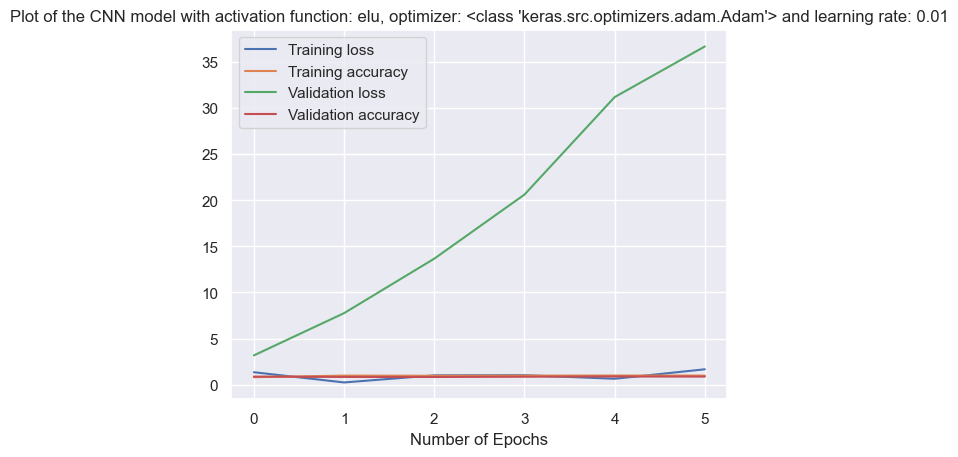

Epoch 1/50
858/858 [==============================] - 14s 16ms/step - loss: 2.5116 - accuracy: 0.7588 - val_loss: 11.6346 - val_accuracy: 0.7557
Epoch 2/50
858/858 [==============================] - 14s 16ms/step - loss: 0.2642 - accuracy: 0.9811 - val_loss: 5.5127 - val_accuracy: 0.8578
Epoch 3/50
858/858 [==============================] - 15s 17ms/step - loss: 0.1033 - accuracy: 0.9890 - val_loss: 6.0678 - val_accuracy: 0.8271
Epoch 4/50
858/858 [==============================] - 15s 17ms/step - loss: 0.4755 - accuracy: 0.9721 - val_loss: 8.0769 - val_accuracy: 0.8514
Epoch 5/50
858/858 [==============================] - 14s 16ms/step - loss: 2.0433 - accuracy: 0.9617 - val_loss: 30.3714 - val_accuracy: 0.8397
Epoch 6/50
858/858 [==============================] - 14s 16ms/step - loss: 0.8565 - accuracy: 0.9879 - val_loss: 31.2023 - val_accuracy: 0.8564
Epoch 7/50
858/858 [==============================] - 14s 16ms/step - loss: 3.3077 - accuracy: 0.9793 - val_loss: 73.0682 - val_accur

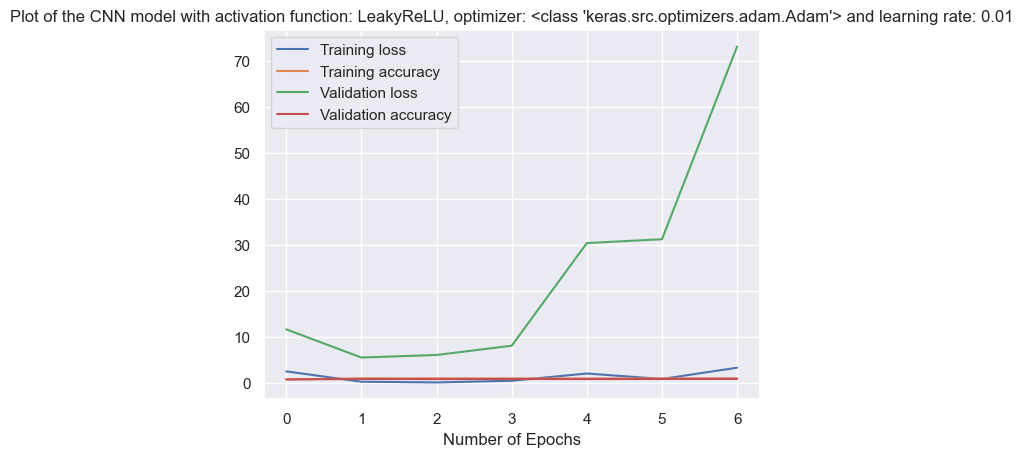

Epoch 1/50
858/858 [==============================] - 17s 20ms/step - loss: 9.1001 - accuracy: 0.3966 - val_loss: 6.2461 - val_accuracy: 0.0368
Epoch 2/50
858/858 [==============================] - 16s 19ms/step - loss: 7.2546 - accuracy: 0.0411 - val_loss: 10.1235 - val_accuracy: 0.0544
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 7.1465 - accuracy: 0.0436 - val_loss: 5.0743 - val_accuracy: 0.0435
Epoch 4/50
858/858 [==============================] - 16s 18ms/step - loss: 7.1383 - accuracy: 0.0421 - val_loss: 6.3165 - val_accuracy: 0.0613
Epoch 5/50
858/858 [==============================] - 16s 18ms/step - loss: 7.5356 - accuracy: 0.0443 - val_loss: 9.4454 - val_accuracy: 0.0301
Epoch 6/50
858/858 [==============================] - 16s 18ms/step - loss: 7.2638 - accuracy: 0.0412 - val_loss: 5.8915 - val_accuracy: 0.0435
Epoch 7/50
858/858 [==============================] - 16s 18ms/step - loss: 7.4342 - accuracy: 0.0437 - val_loss: 9.7864 - val_accuracy

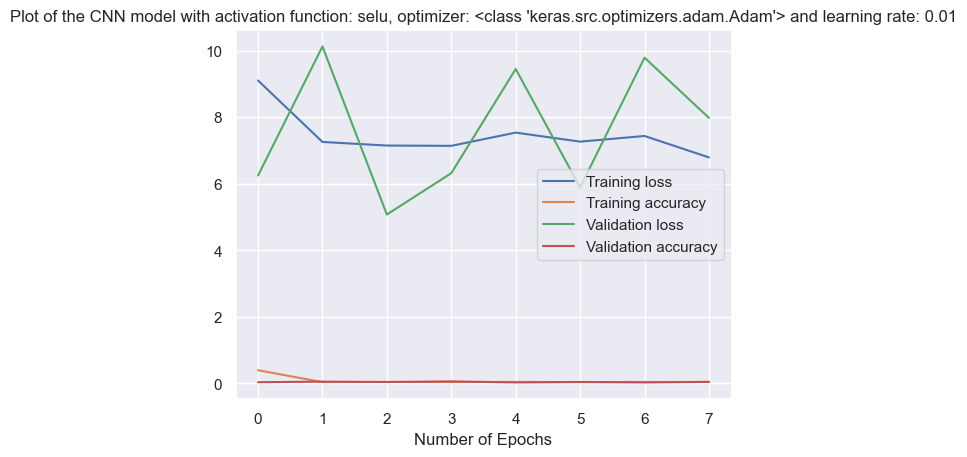

Epoch 1/50
858/858 [==============================] - 17s 19ms/step - loss: 4.3176 - accuracy: 0.3932 - val_loss: 5.2754 - val_accuracy: 0.0346
Epoch 2/50
858/858 [==============================] - 16s 18ms/step - loss: 4.1939 - accuracy: 0.0425 - val_loss: 5.2123 - val_accuracy: 0.0226
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 4.3789 - accuracy: 0.0425 - val_loss: 4.9607 - val_accuracy: 0.0457
Epoch 4/50
858/858 [==============================] - 16s 18ms/step - loss: 4.2300 - accuracy: 0.0430 - val_loss: 3.9408 - val_accuracy: 0.0613
Epoch 5/50
858/858 [==============================] - 16s 19ms/step - loss: 4.2492 - accuracy: 0.0425 - val_loss: 4.2017 - val_accuracy: 0.0215
Epoch 6/50
858/858 [==============================] - 15s 18ms/step - loss: 4.2996 - accuracy: 0.0415 - val_loss: 5.1193 - val_accuracy: 0.0346
Epoch 7/50
858/858 [==============================] - 15s 18ms/step - loss: 4.2296 - accuracy: 0.0433 - val_loss: 4.5558 - val_accuracy:

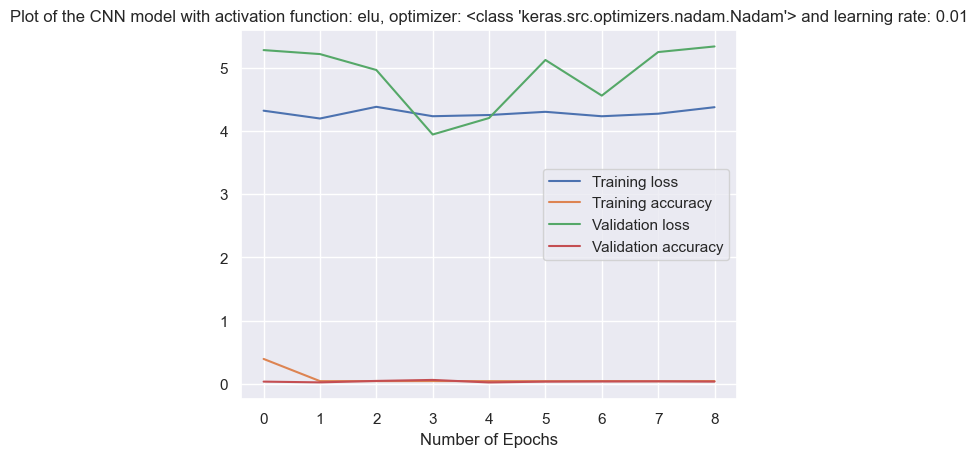

Epoch 1/50
858/858 [==============================] - 14s 16ms/step - loss: 2.1886 - accuracy: 0.8094 - val_loss: 2.3757 - val_accuracy: 0.8489
Epoch 2/50
858/858 [==============================] - 15s 17ms/step - loss: 0.0544 - accuracy: 0.9916 - val_loss: 2.2289 - val_accuracy: 0.8678
Epoch 3/50
858/858 [==============================] - 14s 16ms/step - loss: 0.1378 - accuracy: 0.9862 - val_loss: 2.7661 - val_accuracy: 0.8756
Epoch 4/50
858/858 [==============================] - 15s 17ms/step - loss: 0.2461 - accuracy: 0.9819 - val_loss: 7.8486 - val_accuracy: 0.8307
Epoch 5/50
858/858 [==============================] - 14s 17ms/step - loss: 1.6349 - accuracy: 0.9668 - val_loss: 24.6761 - val_accuracy: 0.8477
Epoch 6/50
858/858 [==============================] - 14s 16ms/step - loss: 0.6927 - accuracy: 0.9905 - val_loss: 32.4254 - val_accuracy: 0.8569
Epoch 7/50
858/858 [==============================] - 14s 16ms/step - loss: 1.2636 - accuracy: 0.9883 - val_loss: 47.9220 - val_accura

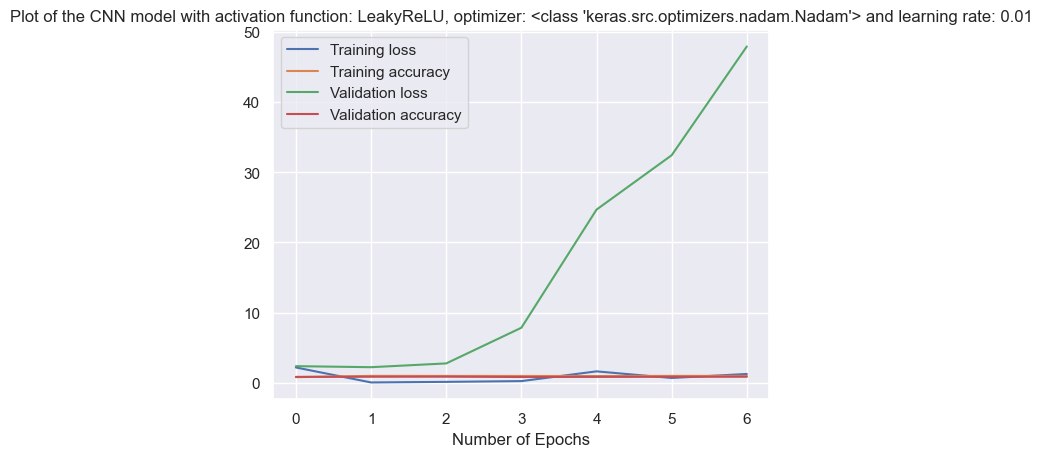

Epoch 1/50
858/858 [==============================] - 16s 18ms/step - loss: 4.5521 - accuracy: 0.6202 - val_loss: 1.7903 - val_accuracy: 0.6788
Epoch 2/50
858/858 [==============================] - 16s 18ms/step - loss: 0.8560 - accuracy: 0.8152 - val_loss: 3.2479 - val_accuracy: 0.7345
Epoch 3/50
858/858 [==============================] - 17s 20ms/step - loss: 0.6119 - accuracy: 0.9252 - val_loss: 8.6254 - val_accuracy: 0.7705
Epoch 4/50
858/858 [==============================] - 17s 19ms/step - loss: 0.8456 - accuracy: 0.9500 - val_loss: 10.0914 - val_accuracy: 0.8293
Epoch 5/50
858/858 [==============================] - 16s 19ms/step - loss: 1.2485 - accuracy: 0.9625 - val_loss: 18.0585 - val_accuracy: 0.8424
Epoch 6/50
858/858 [==============================] - 16s 19ms/step - loss: 1.1085 - accuracy: 0.9769 - val_loss: 28.8274 - val_accuracy: 0.8447


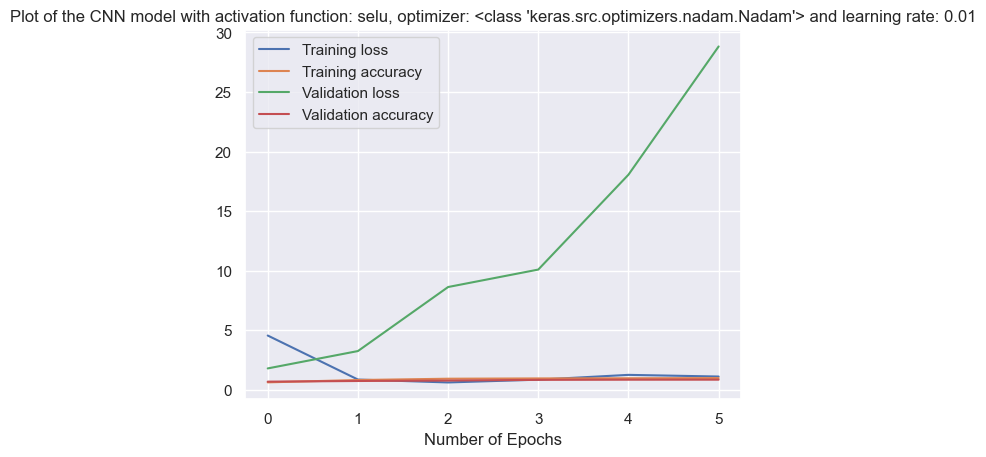

Epoch 1/50
858/858 [==============================] - 15s 18ms/step - loss: 3.1738 - accuracy: 0.0549 - val_loss: 3.1831 - val_accuracy: 0.0421
Epoch 2/50
858/858 [==============================] - 16s 18ms/step - loss: 3.1617 - accuracy: 0.0653 - val_loss: 3.1770 - val_accuracy: 0.0538
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 3.1506 - accuracy: 0.0897 - val_loss: 3.1636 - val_accuracy: 0.0706
Epoch 4/50
858/858 [==============================] - 16s 18ms/step - loss: 3.1359 - accuracy: 0.1195 - val_loss: 3.1470 - val_accuracy: 0.0954
Epoch 5/50
858/858 [==============================] - 16s 18ms/step - loss: 3.1140 - accuracy: 0.1445 - val_loss: 3.1193 - val_accuracy: 0.0929
Epoch 6/50
858/858 [==============================] - 16s 18ms/step - loss: 3.0786 - accuracy: 0.1726 - val_loss: 3.0736 - val_accuracy: 0.1788
Epoch 7/50
858/858 [==============================] - 16s 18ms/step - loss: 3.0131 - accuracy: 0.2193 - val_loss: 2.9810 - val_accuracy:

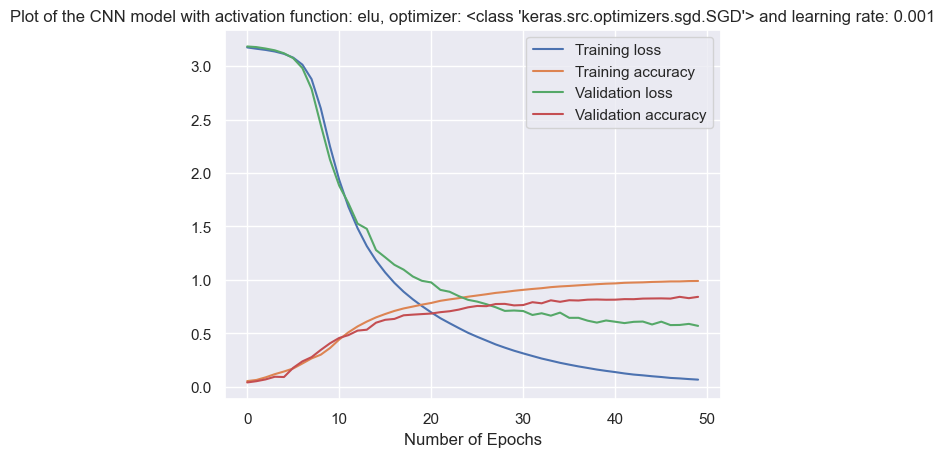

Epoch 1/50
858/858 [==============================] - 15s 17ms/step - loss: 3.1781 - accuracy: 0.0463 - val_loss: 3.1799 - val_accuracy: 0.0340
Epoch 2/50
858/858 [==============================] - 14s 17ms/step - loss: 3.1744 - accuracy: 0.0504 - val_loss: 3.1808 - val_accuracy: 0.0337
Epoch 3/50
858/858 [==============================] - 14s 17ms/step - loss: 3.1716 - accuracy: 0.0554 - val_loss: 3.1807 - val_accuracy: 0.0368
Epoch 4/50
858/858 [==============================] - 15s 17ms/step - loss: 3.1690 - accuracy: 0.0591 - val_loss: 3.1804 - val_accuracy: 0.0427
Epoch 5/50
858/858 [==============================] - 14s 17ms/step - loss: 3.1661 - accuracy: 0.0614 - val_loss: 3.1795 - val_accuracy: 0.0446
Epoch 6/50
858/858 [==============================] - 14s 17ms/step - loss: 3.1627 - accuracy: 0.0651 - val_loss: 3.1784 - val_accuracy: 0.0482
Epoch 7/50
858/858 [==============================] - 14s 17ms/step - loss: 3.1584 - accuracy: 0.0685 - val_loss: 3.1766 - val_accuracy:

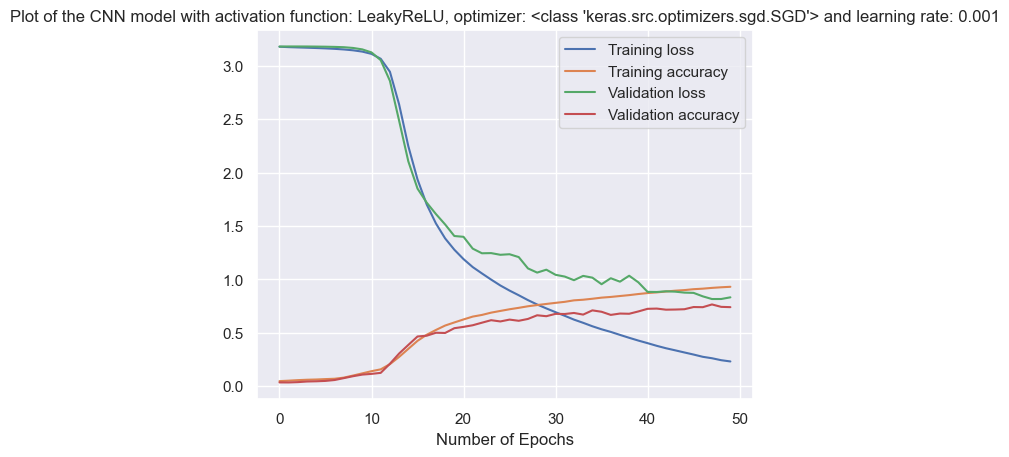

Epoch 1/50
858/858 [==============================] - 20s 23ms/step - loss: 3.1377 - accuracy: 0.0751 - val_loss: 3.1095 - val_accuracy: 0.0937
Epoch 2/50
858/858 [==============================] - 23s 26ms/step - loss: 3.0029 - accuracy: 0.1674 - val_loss: 2.9303 - val_accuracy: 0.1804
Epoch 3/50
858/858 [==============================] - 25s 29ms/step - loss: 2.7222 - accuracy: 0.2821 - val_loss: 2.5505 - val_accuracy: 0.3101
Epoch 4/50
858/858 [==============================] - 24s 28ms/step - loss: 2.2668 - accuracy: 0.3850 - val_loss: 2.0969 - val_accuracy: 0.4116
Epoch 5/50
858/858 [==============================] - 23s 27ms/step - loss: 1.8400 - accuracy: 0.5005 - val_loss: 1.7642 - val_accuracy: 0.4964
Epoch 6/50
858/858 [==============================] - 26s 30ms/step - loss: 1.5123 - accuracy: 0.5903 - val_loss: 1.5317 - val_accuracy: 0.5561
Epoch 7/50
858/858 [==============================] - 23s 27ms/step - loss: 1.2682 - accuracy: 0.6524 - val_loss: 1.3555 - val_accuracy:

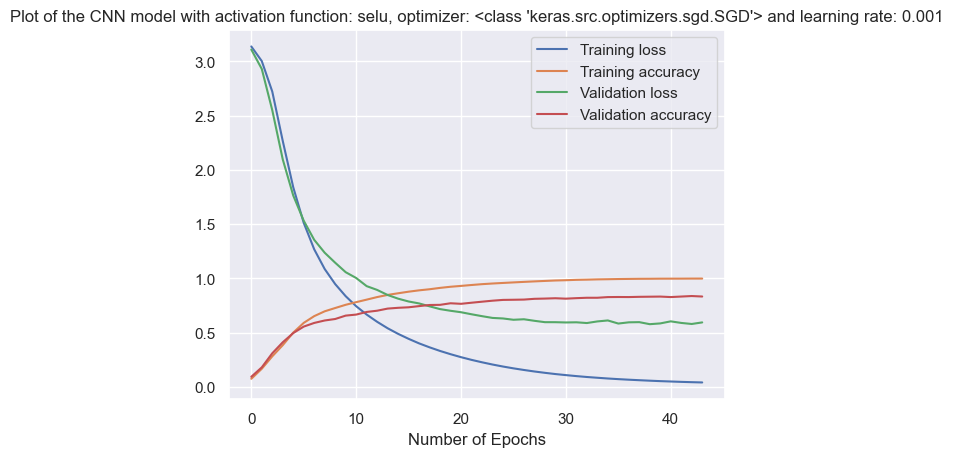

Epoch 1/50
858/858 [==============================] - 21s 24ms/step - loss: 0.6524 - accuracy: 0.8076 - val_loss: 0.4725 - val_accuracy: 0.8767
Epoch 2/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0221 - accuracy: 0.9961 - val_loss: 0.4913 - val_accuracy: 0.8954
Epoch 3/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.4947 - val_accuracy: 0.8929
Epoch 4/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.5537 - val_accuracy: 0.8898
Epoch 5/50
858/858 [==============================] - 22s 26ms/step - loss: 2.9921e-04 - accuracy: 1.0000 - val_loss: 0.5799 - val_accuracy: 0.8993
Epoch 6/50
858/858 [==============================] - 24s 28ms/step - loss: 1.4849e-04 - accuracy: 1.0000 - val_loss: 0.6025 - val_accuracy: 0.8963


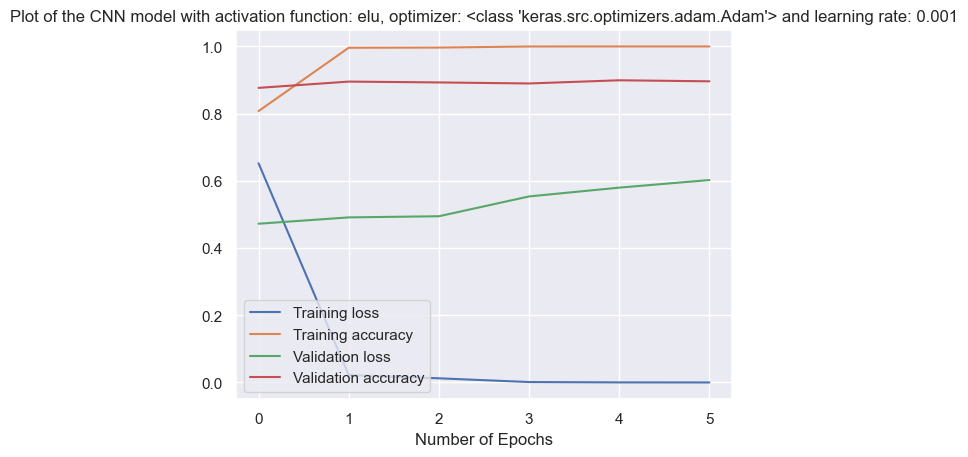

Epoch 1/50
858/858 [==============================] - 20s 23ms/step - loss: 0.7923 - accuracy: 0.7645 - val_loss: 0.5183 - val_accuracy: 0.8469
Epoch 2/50
858/858 [==============================] - 20s 23ms/step - loss: 0.0339 - accuracy: 0.9931 - val_loss: 0.5061 - val_accuracy: 0.8938
Epoch 3/50
858/858 [==============================] - 20s 23ms/step - loss: 0.0212 - accuracy: 0.9944 - val_loss: 0.5397 - val_accuracy: 0.8765
Epoch 4/50
858/858 [==============================] - 20s 23ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.6283 - val_accuracy: 0.8896
Epoch 5/50
858/858 [==============================] - 21s 25ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.5506 - val_accuracy: 0.8885
Epoch 6/50
858/858 [==============================] - 20s 23ms/step - loss: 8.6169e-04 - accuracy: 0.9999 - val_loss: 0.5281 - val_accuracy: 0.9091
Epoch 7/50
858/858 [==============================] - 20s 23ms/step - loss: 8.3940e-04 - accuracy: 0.9999 - val_loss: 0.6266 - val_a

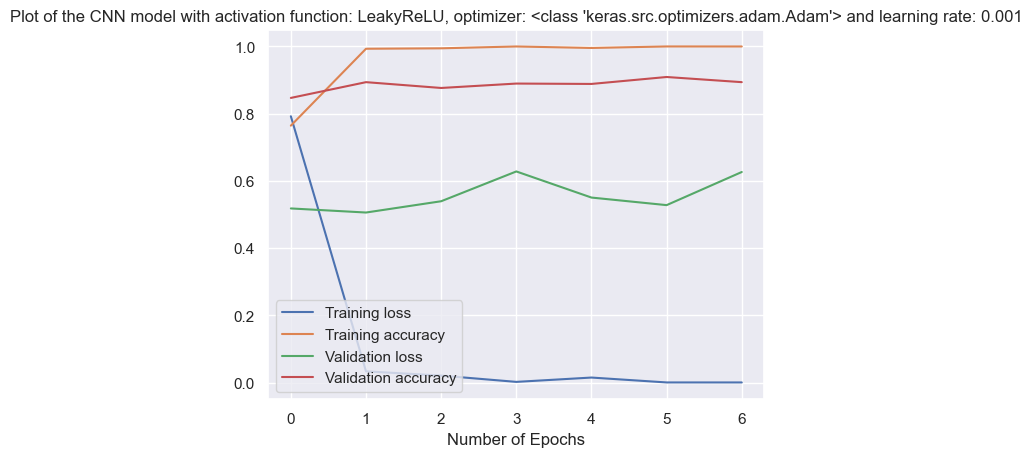

Epoch 1/50
858/858 [==============================] - 22s 26ms/step - loss: 0.6071 - accuracy: 0.8253 - val_loss: 0.4035 - val_accuracy: 0.8779
Epoch 2/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0154 - accuracy: 0.9985 - val_loss: 0.4632 - val_accuracy: 0.8974
Epoch 3/50
858/858 [==============================] - 21s 24ms/step - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.6052 - val_accuracy: 0.8742
Epoch 4/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.5393 - val_accuracy: 0.9088
Epoch 5/50
858/858 [==============================] - 22s 25ms/step - loss: 3.7741e-04 - accuracy: 1.0000 - val_loss: 0.5462 - val_accuracy: 0.9127
Epoch 6/50
858/858 [==============================] - 21s 25ms/step - loss: 2.0934e-04 - accuracy: 1.0000 - val_loss: 0.5734 - val_accuracy: 0.9136


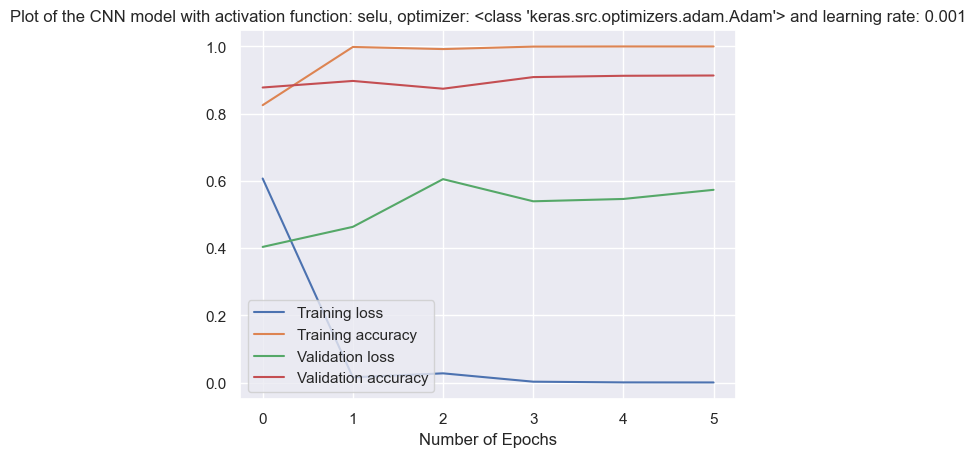

Epoch 1/50
858/858 [==============================] - 23s 26ms/step - loss: 0.6488 - accuracy: 0.8127 - val_loss: 0.4897 - val_accuracy: 0.8751
Epoch 2/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0218 - accuracy: 0.9964 - val_loss: 0.5584 - val_accuracy: 0.8840
Epoch 3/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.4865 - val_accuracy: 0.8924
Epoch 4/50
858/858 [==============================] - 21s 24ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.7391 - val_accuracy: 0.8522
Epoch 5/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.5686 - val_accuracy: 0.9069
Epoch 6/50
858/858 [==============================] - 21s 25ms/step - loss: 3.0463e-04 - accuracy: 1.0000 - val_loss: 0.5880 - val_accuracy: 0.9052
Epoch 7/50
858/858 [==============================] - 20s 24ms/step - loss: 1.3558e-04 - accuracy: 1.0000 - val_loss: 0.6189 - val_a

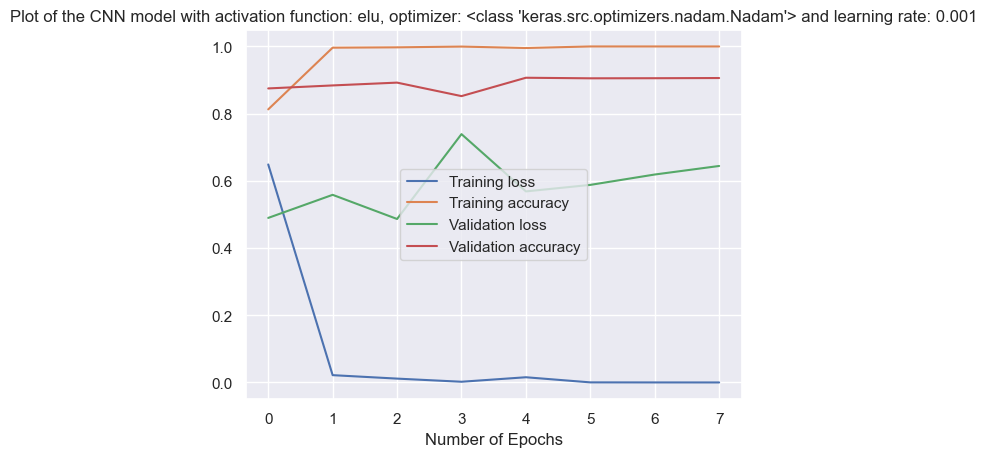

Epoch 1/50
858/858 [==============================] - 20s 23ms/step - loss: 0.7310 - accuracy: 0.7818 - val_loss: 0.4513 - val_accuracy: 0.8737
Epoch 2/50
858/858 [==============================] - 19s 22ms/step - loss: 0.0421 - accuracy: 0.9901 - val_loss: 0.5449 - val_accuracy: 0.8993
Epoch 3/50
858/858 [==============================] - 18s 21ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.5330 - val_accuracy: 0.8907
Epoch 4/50
858/858 [==============================] - 19s 22ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.5101 - val_accuracy: 0.9021
Epoch 5/50
858/858 [==============================] - 19s 23ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.5464 - val_accuracy: 0.9077
Epoch 6/50
858/858 [==============================] - 19s 23ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.7486 - val_accuracy: 0.8667


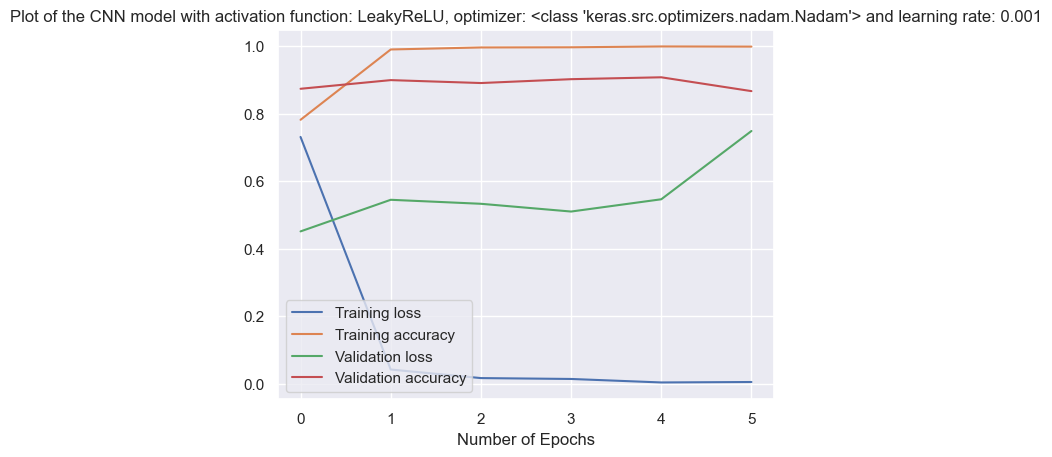

Epoch 1/50
858/858 [==============================] - 23s 26ms/step - loss: 0.5762 - accuracy: 0.8355 - val_loss: 0.4641 - val_accuracy: 0.8728
Epoch 2/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0179 - accuracy: 0.9975 - val_loss: 0.4863 - val_accuracy: 0.8901
Epoch 3/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.4948 - val_accuracy: 0.8985
Epoch 4/50
858/858 [==============================] - 24s 28ms/step - loss: 9.0320e-04 - accuracy: 1.0000 - val_loss: 0.5157 - val_accuracy: 0.9027
Epoch 5/50
858/858 [==============================] - 24s 27ms/step - loss: 3.2747e-04 - accuracy: 1.0000 - val_loss: 0.5211 - val_accuracy: 0.9077
Epoch 6/50
858/858 [==============================] - 23s 26ms/step - loss: 1.8214e-04 - accuracy: 1.0000 - val_loss: 0.5409 - val_accuracy: 0.9124


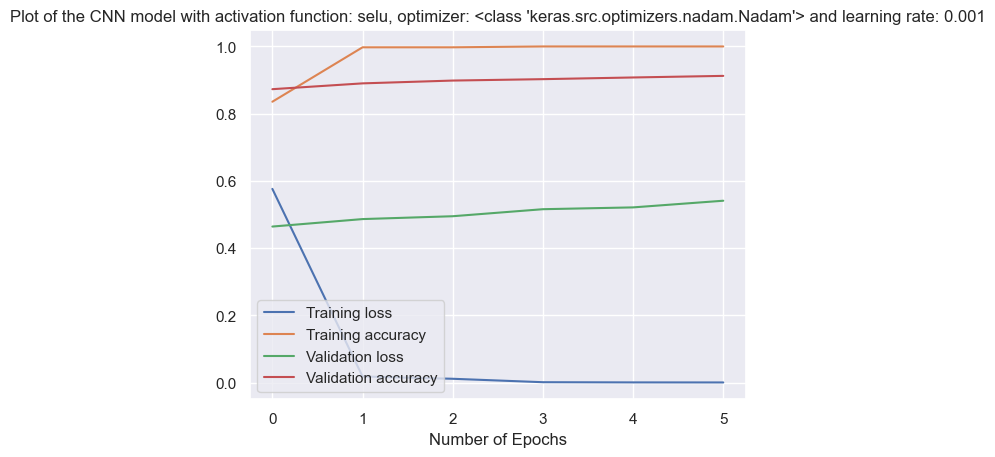

In [37]:
hiddensizes = [64,32,16]
batch_size = 32
n_epochs = 50

def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))
        model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", 
                                  activation=actfn))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(24, activation = "softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), 
                  metrics=["accuracy"])   
    return model
    
def build_cnn(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

res_cnn = []
for i in learningrate:
    for o in optimizer:
        for a in actfn:
            max_val_acc_cnn, history_cnn, model_cnn = build_cnn(hiddensizes, a, o, i, n_epochs, batch_size)
            pd.DataFrame(history_cnn.history).plot()
            plt.xlabel("Number of Epochs")
            plt.title(f'Plot of the CNN model with activation function: {a}, optimizer: {o} and learning rate: {i}')
            plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
            plt.show()
            res_cnn += [[i, o, a, max_val_acc_cnn]]


In [38]:
lr_cnn = []
opt_cnn = []
act_cnn = []
val_acc_cnn = []
for i in range(0, len(res_cnn)):
    lr_cnn.append(res_cnn[i][0])
    opt_cnn.append(res_cnn[i][1])
    act_cnn.append(res_cnn[i][2])
    val_acc_cnn.append(res_cnn[i][3])

print('Table of the maximum validation accuracy for each combination of activation function, optimizer and learning rate for the CNN model: \n')
val_cnn = pd.DataFrame({'Learning rate': lr_cnn, 'Optimizer': opt_cnn, 'Activation function': act_cnn, 
                        'Max validation accuracy': val_acc_cnn})
val_cnn = val_cnn.sort_values('Max validation accuracy')
val_cnn

Table of the maximum validation accuracy for each combination of activation function, optimizer and learning rate for the CNN model: 



,Learning rate,Optimizer,Activation function,Max validation accuracy
5,0.010,<class 'keras.src.optimizers.adam.Adam'>,selu,0.061350
6,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,elu,0.061350
10,0.001,<class 'keras.src.optimizers.sgd.SGD'>,LeakyReLU,0.764361
1,0.010,<class 'keras.src.optimizers.sgd.SGD'>,LeakyReLU,0.836029
11,0.001,<class 'keras.src.optimizers.sgd.SGD'>,selu,0.837702
9,0.001,<class 'keras.src.optimizers.sgd.SGD'>,elu,0.842443
8,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,selu,0.844674
4,0.010,<class 'keras.src.optimizers.adam.Adam'>,LeakyReLU,0.873118
7,0.010,<class 'keras.src.optimizers.nadam.Nadam'>,LeakyReLU,0.875627
0,0.010,<class 'keras.src.optimizers.sgd.SGD'>,elu,0.883157


In general, these CNN models gain better performance since their maximum validation accuracy are larger than the figures for other densely connected models. Most of the maximum validation accuracy scores of these CNN models range from about 0.76 to 0.91. Additionally, the differences between training accuracy and validation accuracy of these CNN models are not large as the figures for other densely connected models, since they are only from around 0.1 to 0.2. Although these differences are not large, they still can indicate overfitting problem, therefore, in order to solve this problem, three methods such as Regularization, Weight initialization and Dropout regularization are used.

The best CNN model is the model with Selu activation function, Adam optimizer and learning rate of 0.001. Its training accuracy is 1, and its maximum validation accuracy is around 0.9136. The difference between its validation accuracy and training accuracy is about 0.0864. The second best CNN model is the model with Selu activation function, Nadam optimizer and learning rate of 0.001. Its training accuracy is 1, and its maximum validation accuracy is about 0.9124. The difference between its validation accuracy and training accuracy is also about 0.0876. These two best models are chosen to apply some regularization methods to mitigate overfitting problem.


#### Apply Regularization methods on the second best CNN model (Selu activation function, Nadam optimizer and learning rate 0.001)


In [39]:
# Try using Regularization for the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001
model_cnn_reg_1 = keras.models.Sequential()
model_cnn_reg_1.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                        activation='selu', padding="same", input_shape=[28, 28, 1], 
                                        kernel_regularizer=keras.regularizers.l2(0.01), 
                                        bias_regularizer=keras.regularizers.l2(0.01)))
model_cnn_reg_1.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_reg_1.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_reg_1.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_reg_1.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, 
                                        padding="same", activation='selu'))
model_cnn_reg_1.add(keras.layers.Flatten())
model_cnn_reg_1.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_reg_1.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                        metrics=["accuracy"])   
history_cnn_reg_1 = model_cnn_reg_1.fit(X_train, y_train, epochs=50, 
                                        callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 23s 26ms/step - loss: 0.6340 - accuracy: 0.8266 - val_loss: 0.4913 - val_accuracy: 0.8561
Epoch 2/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0543 - accuracy: 0.9969 - val_loss: 0.4549 - val_accuracy: 0.8832
Epoch 3/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0274 - accuracy: 0.9997 - val_loss: 0.5510 - val_accuracy: 0.8759
Epoch 4/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0275 - accuracy: 0.9967 - val_loss: 0.4342 - val_accuracy: 0.9002
Epoch 5/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0184 - accuracy: 0.9975 - val_loss: 0.7784 - val_accuracy: 0.8274
Epoch 6/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0222 - accuracy: 0.9964 - val_loss: 0.4775 - val_accuracy: 0.9147
Epoch 7/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy:

According to the performance of the second best CNN model (with Selu activation function, Nadam optimizer and learning rate of 0.001) after using l2 Regularizer, this model converges after epoch 12. Its training accuracy is 1 and its validation accuracy is about 0.9027. The difference between these two values is about 0.0973. Hence, the method of l2 Regulization does not reduce the gap between the training accuracy and validation accuracy of this second best CNN model since the difference between these two values before applying l2 Regularization is 0.0876.


In [40]:
# Try using Weight Initialization for the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001
model_cnn_wi_1 = keras.models.Sequential()
model_cnn_wi_1.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                       activation='selu', padding="same", 
                                       input_shape=[28, 28, 1], kernel_initializer = 'lecun_normal'))
model_cnn_wi_1.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_wi_1.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_wi_1.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_wi_1.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, 
                                       strides=1, padding="same", activation='selu'))
model_cnn_wi_1.add(keras.layers.Flatten())
model_cnn_wi_1.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_wi_1.compile(loss="sparse_categorical_crossentropy", 
                       optimizer=keras.optimizers.Nadam(learning_rate=0.001), metrics=["accuracy"])   
history_cnn_wi_1 = model_cnn_wi_1.fit(X_train, y_train, epochs=50, 
                                      callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 24s 27ms/step - loss: 0.5053 - accuracy: 0.8583 - val_loss: 0.4194 - val_accuracy: 0.8765
Epoch 2/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0143 - accuracy: 0.9989 - val_loss: 0.4313 - val_accuracy: 0.8949
Epoch 3/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.4673 - val_accuracy: 0.8820
Epoch 4/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.4709 - val_accuracy: 0.8988
Epoch 5/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.4828 - val_accuracy: 0.9016
Epoch 6/50
858/858 [==============================] - 22s 26ms/step - loss: 1.3925e-04 - accuracy: 1.0000 - val_loss: 0.4783 - val_accuracy: 0.9080


According to the performance of the second best CNN model (with Selu activation function, Nadam optimizer and learning rate of 0.001) after using Weight Initialization, this model converges after epoch 6, its training accuracy is about 1 and its validation accuracy is about 0.908. The difference between these two values is about 0.092. Hence, the method of Weight Initialization also does not reduce the difference between the training accuracy and the validation accuracy of this second best CNN model since the difference between these two values before applying Weight Initialization is 0.0876.


In [41]:
# Try using Dropout Regularization for the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001
model_cnn_dr_1 = keras.models.Sequential()
model_cnn_dr_1.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                       activation='selu', padding="same", input_shape=[28, 28, 1]))
model_cnn_dr_1.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_dr_1.add(keras.layers.Dropout (0.05))
for n in hiddensizes[1:-1]:
    model_cnn_dr_1.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_dr_1.add(keras.layers.MaxPooling2D(pool_size=2))
    model_cnn_dr_1.add(keras.layers.Dropout (0.05))
model_cnn_dr_1.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, 
                                       strides=1, padding="same", activation='selu'))
model_cnn_dr_1.add(keras.layers.Flatten())
model_cnn_dr_1.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_dr_1.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
                       metrics=["accuracy"])   
history_cnn_dr_1 = model_cnn_dr_1.fit(X_train, y_train, epochs=50, 
                                      callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 26s 29ms/step - loss: 0.6450 - accuracy: 0.8121 - val_loss: 0.3691 - val_accuracy: 0.8820
Epoch 2/50
858/858 [==============================] - 25s 29ms/step - loss: 0.0269 - accuracy: 0.9953 - val_loss: 0.3271 - val_accuracy: 0.9088
Epoch 3/50
858/858 [==============================] - 26s 31ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.4485 - val_accuracy: 0.8918
Epoch 4/50
858/858 [==============================] - 25s 29ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.4957 - val_accuracy: 0.8985
Epoch 5/50
858/858 [==============================] - 25s 29ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.6247 - val_accuracy: 0.8918
Epoch 6/50
858/858 [==============================] - 25s 29ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.3954 - val_accuracy: 0.9225
Epoch 7/50
858/858 [==============================] - 26s 30ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.5070 - val_accuracy:

According to the performance of the second best CNN model (with Selu activation function, Nadam optimizer and learning rate of 0.001) after using Dropout Regularization, this model converges after epoch 7, its training accuracy is about 0.9979 and its validation accuracy is about 0.9021. The difference between these two values is about 0.0958. Hence, the method of Dropout Regularization also does not reduce the difference between the training accuracy and the validation accuracy of this second best CNN model since the difference between these two values before applying Dropout Regularization is 0.0876.


#### Apply Regularization methods on the best CNN model (Selu activation function, Adam optimizer and learning rate 0.001)


In [42]:
# Try using Regularization for the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001
model_cnn_reg_2 = keras.models.Sequential()
model_cnn_reg_2.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                        activation='selu', padding="same", input_shape=[28, 28, 1], 
                                        kernel_regularizer=keras.regularizers.l2(0.01), 
                                        bias_regularizer=keras.regularizers.l2(0.01)))
model_cnn_reg_2.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_reg_2.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_reg_2.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_reg_2.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, 
                                        strides=1, padding="same", activation='selu'))
model_cnn_reg_2.add(keras.layers.Flatten())
model_cnn_reg_2.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_reg_2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                        metrics=["accuracy"])   
history_cnn_reg_2 = model_cnn_reg_2.fit(X_train, y_train, epochs=50, 
                                        callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 24s 27ms/step - loss: 0.6275 - accuracy: 0.8290 - val_loss: 0.3969 - val_accuracy: 0.8904
Epoch 2/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0486 - accuracy: 0.9976 - val_loss: 0.4046 - val_accuracy: 0.9055
Epoch 3/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0279 - accuracy: 0.9990 - val_loss: 0.3782 - val_accuracy: 0.9080
Epoch 4/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0378 - accuracy: 0.9929 - val_loss: 0.5874 - val_accuracy: 0.8659
Epoch 5/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0165 - accuracy: 0.9990 - val_loss: 0.3790 - val_accuracy: 0.9255
Epoch 6/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.3470 - val_accuracy: 0.9286
Epoch 7/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.4123 - val_accuracy:

According to the performance of the best CNN model (with Selu activation function, Adam optimizer and learning rate of 0.001) after using l2 Regularizer, this model converges after epoch 11, its training accuracy is about 1 and its validation accuracy is about 0.9191. The difference between these two values is about 0.0809. Hence, the method of l2 Regulization can slightly reduce the difference between the training accuracy and the validation accuracy of this best CNN model since the difference between these two values before applying l2 Regularization is 0.0864. However, it does not improve the validation accuracy much because the original validation accuracy is 0.9136.


In [43]:
# Try using Weight Initialization for the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001
model_cnn_wi_2 = keras.models.Sequential()
model_cnn_wi_2.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                       activation='selu', padding="same", input_shape=[28, 28, 1], 
                                       kernel_initializer = 'lecun_normal'))
model_cnn_wi_2.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_wi_2.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_wi_2.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_wi_2.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, 
                                       padding="same", activation='selu'))
model_cnn_wi_2.add(keras.layers.Flatten())
model_cnn_wi_2.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_wi_2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])   
history_cnn_wi_2 = model_cnn_wi_2.fit(X_train, y_train, epochs=50, 
                                      callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 22s 26ms/step - loss: 0.5768 - accuracy: 0.8359 - val_loss: 0.3951 - val_accuracy: 0.8781
Epoch 2/50
858/858 [==============================] - 21s 25ms/step - loss: 0.0159 - accuracy: 0.9986 - val_loss: 0.3748 - val_accuracy: 0.8974
Epoch 3/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.4356 - val_accuracy: 0.8921
Epoch 4/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.4787 - val_accuracy: 0.8979
Epoch 5/50
858/858 [==============================] - 23s 26ms/step - loss: 4.5626e-04 - accuracy: 1.0000 - val_loss: 0.4567 - val_accuracy: 0.9013
Epoch 6/50
858/858 [==============================] - 22s 26ms/step - loss: 1.5869e-04 - accuracy: 1.0000 - val_loss: 0.4449 - val_accuracy: 0.9096
Epoch 7/50
858/858 [==============================] - 22s 26ms/step - loss: 9.6578e-05 - accuracy: 1.0000 - val_loss: 0.4586 - v

According to the performance of the best CNN model (with Selu activation function, Adam optimizer and learning rate of 0.001) after using Weight Initialization, after epoch 7, its training accuracy is about 1 and its validation accuracy is about 0.9094. The difference between these two values is about 0.0906. Hence, the method of Weight Initialization does not reduce the difference between training accuracy and validation accuracy of this best CNN model since the gap between these two values before applying Weight Initialization is 0.0864.


In [44]:
# Try using Dropout Regularization for the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001
model_cnn_dr_2 = keras.models.Sequential()
model_cnn_dr_2.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, 
                                       activation='selu', padding="same", input_shape=[28, 28, 1]))
model_cnn_dr_2.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_dr_2.add(keras.layers.Dropout (0.05))
for n in hiddensizes[1:-1]:
    model_cnn_dr_2.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_dr_2.add(keras.layers.MaxPooling2D(pool_size=2))
    model_cnn_dr_2.add(keras.layers.Dropout (0.05))
model_cnn_dr_2.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, 
                                       strides=1, padding="same", activation='selu'))
model_cnn_dr_2.add(keras.layers.Flatten())
model_cnn_dr_2.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_dr_2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                       metrics=["accuracy"])   
history_cnn_dr_2 = model_cnn_dr_2.fit(X_train, y_train, epochs=50, 
                                      callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 25s 28ms/step - loss: 0.5971 - accuracy: 0.8245 - val_loss: 0.4035 - val_accuracy: 0.8756
Epoch 2/50
858/858 [==============================] - 25s 29ms/step - loss: 0.0298 - accuracy: 0.9942 - val_loss: 0.4644 - val_accuracy: 0.8798
Epoch 3/50
858/858 [==============================] - 26s 31ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.4454 - val_accuracy: 0.9071
Epoch 4/50
858/858 [==============================] - 26s 30ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.4577 - val_accuracy: 0.9102
Epoch 5/50
858/858 [==============================] - 25s 29ms/step - loss: 6.2306e-04 - accuracy: 1.0000 - val_loss: 0.4802 - val_accuracy: 0.9194
Epoch 6/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.6384 - val_accuracy: 0.8804


According to the performance of the best CNN model (with Selu activation function, Adam optimizer and learning rate of 0.001) after using Dropout Regularization, this model converges after epoch 6, its training accuracy is about 0.9908 and its validation accuracy is about 0.8804. The difference between these two values is about 0.1104. Hence, the method of Dropout Regularization also does not reduce the gap between the training accuracy and the validation accuracy of this best CNN model since the difference between these two values before applying Dropout Regularization is 0.0864.

In conclusion, in comparison with the best densely connected model, the best CNN model (with Selu activation function, Adam optimizer and learning rate of 0.001), and the second best CNN model (with Selu activation function, Nadam optimizer and learning rate of 0.001) obtain better validation accuracy score. Therefore, these two best models are used in prediction process. In addition, three methods (Regularization, Weight initialization and Dropout regularization) do not reduce the difference between training accuracy and validation accuracy, hence they can not mitigate the overfitting problem. Therefore, these two best CNN models are used to generate predictions without applying any regularization methods.


### 3.3 Perform a statistical test between the best and the second best models


#### Fitting the second best CNN model (Selu activation function, Nadam optimizer and learning rate of 0.001) on training data


In [45]:
# Training the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001 on the training data
model_cnn_final_1 = keras.models.Sequential()
model_cnn_final_1.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, 
                                          strides=1, activation='selu', padding="same", input_shape=[28, 28, 1]))
model_cnn_final_1.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_final_1.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_final_1.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_final_1.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, 
                                          padding="same", activation='selu'))
model_cnn_final_1.add(keras.layers.Flatten())
model_cnn_final_1.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_final_1.compile(loss="sparse_categorical_crossentropy", 
                          optimizer=keras.optimizers.Nadam(learning_rate=0.001), metrics=["accuracy"])   
history_cnn_final_1 = model_cnn_final_1.fit(X_train, y_train, epochs=50, 
                                            callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 22s 25ms/step - loss: 0.5470 - accuracy: 0.8462 - val_loss: 0.3893 - val_accuracy: 0.8784
Epoch 2/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0150 - accuracy: 0.9982 - val_loss: 0.4306 - val_accuracy: 0.8996
Epoch 3/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.3856 - val_accuracy: 0.9169
Epoch 4/50
858/858 [==============================] - 23s 27ms/step - loss: 7.7819e-04 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.9155
Epoch 5/50
858/858 [==============================] - 21s 25ms/step - loss: 3.5748e-04 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.9158
Epoch 6/50
858/858 [==============================] - 22s 26ms/step - loss: 2.0846e-04 - accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9189
Epoch 7/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0102 - accuracy: 0.9975 - val_loss: 1.0450 - v

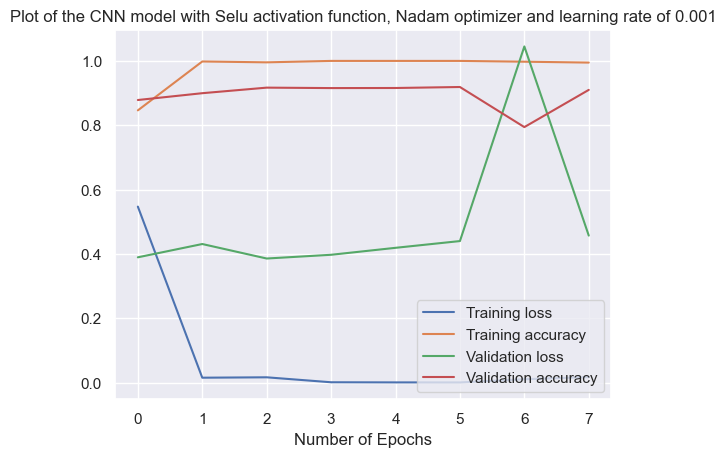

In [47]:
# Plot of the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001
pd.DataFrame(history_cnn_final_1.history).plot()
plt.xlabel("Number of Epochs")
plt.title(f'Plot of the CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001')
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'],loc = 'lower right')
plt.show()

#### Fitting the best CNN model (Selu activation function, Adam optimizer and learning rate of 0.001) on training data


In [46]:
# Training the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001 on the training data
model_cnn_final_2 = keras.models.Sequential()
model_cnn_final_2.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation='selu', padding="same", 
                              input_shape=[28, 28, 1]))
model_cnn_final_2.add(keras.layers.MaxPooling2D(pool_size=2))
for n in hiddensizes[1:-1]:
    model_cnn_final_2.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation='selu'))
    model_cnn_final_2.add(keras.layers.MaxPooling2D(pool_size=2))
model_cnn_final_2.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation='selu'))
model_cnn_final_2.add(keras.layers.Flatten())
model_cnn_final_2.add(keras.layers.Dense(24, activation = "softmax"))
model_cnn_final_2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])   
history_cnn_final_2 = model_cnn_final_2.fit(X_train, y_train, epochs=50, callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/50
858/858 [==============================] - 22s 25ms/step - loss: 0.6135 - accuracy: 0.8265 - val_loss: 0.4373 - val_accuracy: 0.8737
Epoch 2/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0202 - accuracy: 0.9972 - val_loss: 0.4288 - val_accuracy: 0.9069
Epoch 3/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.5204 - val_accuracy: 0.8781
Epoch 4/50
858/858 [==============================] - 24s 28ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.4798 - val_accuracy: 0.9166
Epoch 5/50
858/858 [==============================] - 24s 28ms/step - loss: 3.2926e-04 - accuracy: 1.0000 - val_loss: 0.4928 - val_accuracy: 0.9161
Epoch 6/50
858/858 [==============================] - 22s 26ms/step - loss: 1.8261e-04 - accuracy: 1.0000 - val_loss: 0.5115 - val_accuracy: 0.9186
Epoch 7/50
858/858 [==============================] - 22s 25ms/step - loss: 1.1708e-04 - accuracy: 1.0000 - val_loss: 0.5211 - v

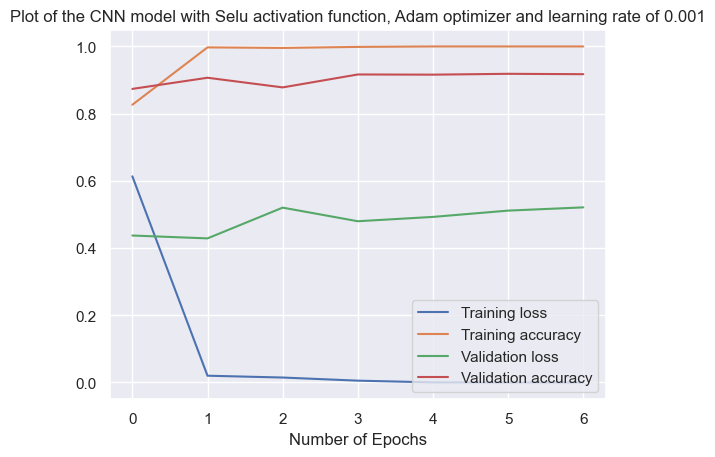

In [48]:
# Plot of the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001
pd.DataFrame(history_cnn_final_2.history).plot()
plt.xlabel("Number of Epochs")
plt.title(f'Plot of the CNN model with Selu activation function, Adam optimizer and learning rate of 0.001')
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'],loc = 'lower right')
plt.show()

#### Perform a statistical test between the best CNN model and the second best CNN model


In [49]:
# Making prediction from the best CNN model (with Selu activation function, Adam optimizer and learning rate of 0.001), 
# and the second best CNN model (with Selu activation function, Nadam optimizer and learning rate of 0.001) on the validation set
y_val_pred = [] 
y_val_pred += [np.argmax(model_cnn_final_2.predict(X_val),axis=1)]
y_val_pred += [np.argmax(model_cnn_final_1.predict(X_val),axis=1)]
print(y_val_pred)

113/113 [==============================] - 1s 7ms/step
[array([ 6,  5,  9, ..., 23,  7, 17]), array([ 6,  5,  9, ..., 23,  7, 13])]


In [50]:
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import permutation_test
# Perform statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
p_value = permutation_test(y_val_pred[0], y_val_pred[1], paired=True,
                           func=lambda x, y: np.abs(accuracy_score(y_val,x) - accuracy_score(y_val,y)),
                           method="approximate", seed=1, num_rounds=1000)
print(f'With the threshold of 0.05, the P-value in comparing the two best models is {p_value}, which is below the threshold, hence the difference in performance between these two best models is significant.')

With the threshold of 0.05, the P-value in comparing the two best models is 0.028971028971028972, which is below the threshold, hence the difference in performance between these two best models is significant.


The best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001 converges with the validation accuracy of 0.9175, and the second best CNN model with Selu activation function, Nadam optimizer and learning rate of 0.001 converges with the validation accuracy is 0.9099. Additionally, the difference in the performance of these two best models is significant because the p-value in comparing these two best models is below 0.05, therefore, the best CNN model with Selu activation function, Adam optimizer and learning rate of 0.001 is chosen to make predictions on the testing data.


## 4. Model predictions


In [51]:
# Evaluating the final CNN model with Selu activation function, Adam optimizer and learning rate of 0.001 on the testing set
testres_1 = model_cnn_final_2.evaluate(X_test, y_test)
print('The testing loss of the final CNN model is: ', testres_1[0])
print('The testing accuracy of the final CNN model is: ', testres_1[1])

113/113 [==============================] - 1s 7ms/step - loss: 0.4283 - accuracy: 0.9044
The testing loss of the final CNN model is:  0.4282926917076111
The testing accuracy of the final CNN model is:  0.9043502807617188


In [52]:
# Making predictions from the final CNN model with Elu activation function, Nadam optimizer and learning rate of 0.001 on the testing set
y_pred = np.argmax(model_cnn_final_2.predict(X_test, verbose = 0),axis=1)

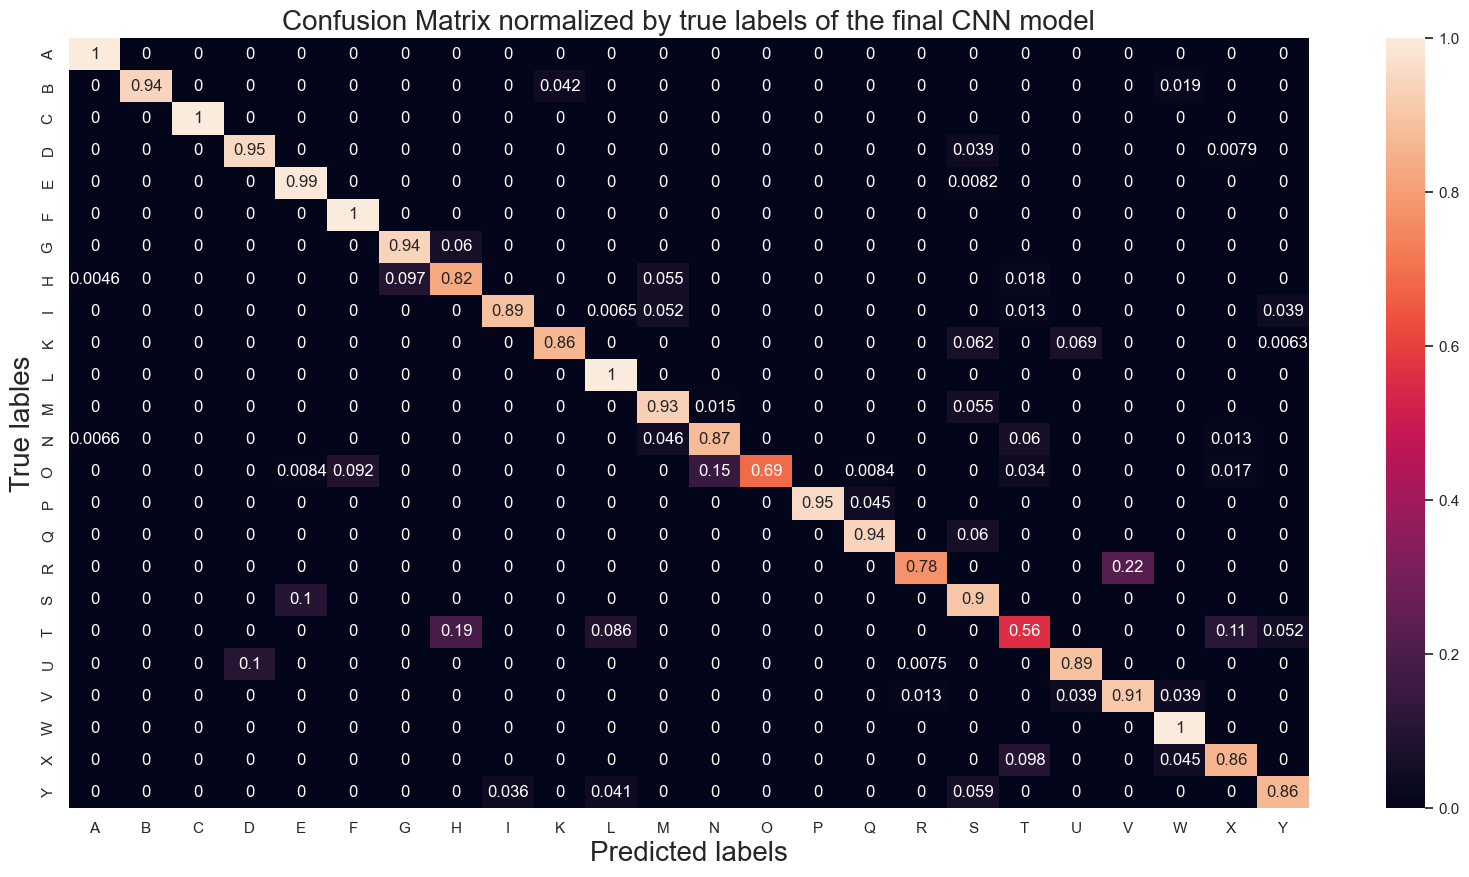

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_test_label = y_test.apply(lambda x: class_names[x])
y_pred_label = pd.Series(y_pred).apply(lambda x: class_names[x])

conf_mat_norm = confusion_matrix(y_test_label, y_pred_label, normalize = 'true')
conf_mat_norm = pd.DataFrame(conf_mat_norm, index = class_names, columns = class_names)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat_norm, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True lables', fontsize = 20)
plt.title('Confusion Matrix normalized by true labels of the final CNN model', fontsize = 20, loc = "center")
plt.show()

According to the confusion matrix normalized by true labels, only 56% observations of the letter 'T' are predicted correctly. In addition, the letter 'O' has only 69% observations which are predicted correctly, and the letter 'R' has only 78% observations which are predicted correctly. The remaining letters have around 80% observations or more being predicted correctly. The letters 'A', 'C', 'F', 'L', 'W' are completely predicted correctly.


In [54]:
# Accuracy score for each individual letter
acc = pd.DataFrame({'Predicted labels': y_pred_label, 'True labels':y_test_label})
acc_v = acc[acc['Predicted labels'] == acc['True labels']]
acc_v = pd.DataFrame(acc_v.drop('True labels', axis = 1).value_counts(), 
                     columns = ["Number of correct prediction"]).sort_values('Predicted labels')
count_pred = pd.DataFrame({'Predicted labels': y_pred_label}).value_counts()
count_pred = pd.DataFrame(count_pred, columns = ["Total number of prediction"]).sort_values('Predicted labels')
acc_total = pd.concat([acc_v, count_pred], axis=1)
acc_total['Accuracy_score'] = acc_total['Number of correct prediction']/acc_total['Total number of prediction']

print('The table of accuracy score of the final CNN model:')
acc_total.sort_values('Accuracy_score')

The table of accuracy score of the final CNN model:


,Number of correct prediction,Total number of prediction,Accuracy_score
Predicted labels,,,
T,65,97,0.670103
S,124,167,0.742515
H,179,212,0.844340
L,100,118,0.847458
W,96,112,0.857143
X,113,131,0.862595
N,132,153,0.862745
M,185,212,0.872642
U,119,136,0.875000


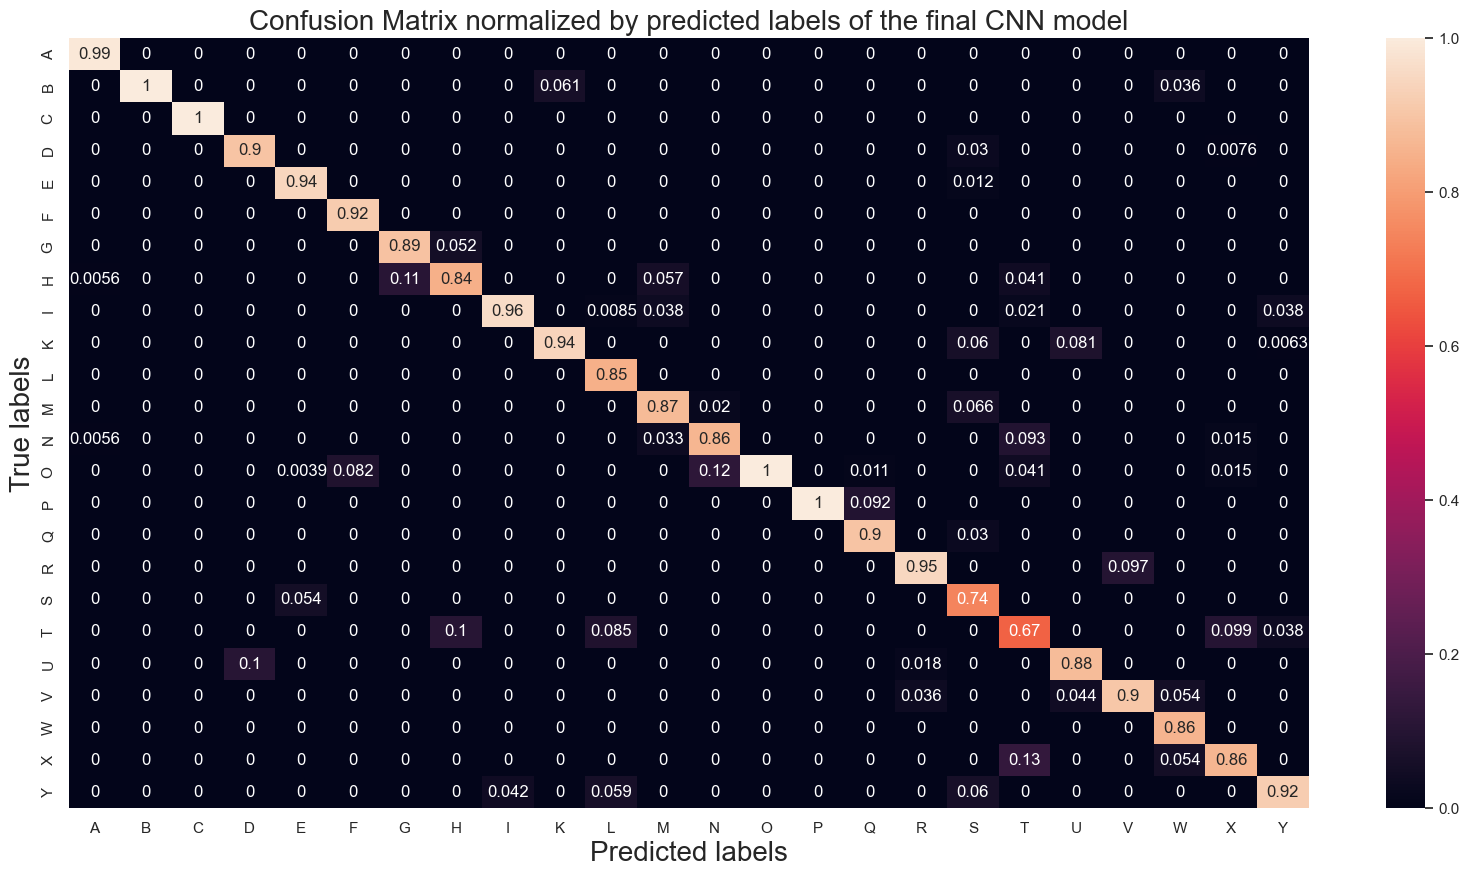

In [55]:
conf_mat = confusion_matrix(y_test, y_pred, normalize = "pred")
conf_mat = pd.DataFrame(conf_mat, index = class_names, columns = class_names)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True labels', fontsize = 20)
plt.title('Confusion Matrix normalized by predicted labels of the final CNN model', fontsize = 20, loc = "center")
plt.show()

According to the confusion matrix normalized by predicted labels and the table of accuracy score of the final CNN model above, the letter 'T' has the lowest accuracy score (only 0.67) because among all letters are predicted as 'T', only 67% observations are truely 'T'. The letter 'S' has the second lowest accuracy score because among all letters are predicted as 'S', only about 74% observations are truely 'S'.


In [56]:
# The most common misclassification
diff = pd.DataFrame({'True labels':y_test_label, 'Predicted labels': y_pred_label})
diff = diff.loc[diff['True labels'] != diff['Predicted labels']].reset_index(drop = True)
nrow = len(diff)
diff_v = pd.DataFrame(diff.groupby("True labels").value_counts(), columns = ["Count"])
diff_v['Proportion'] = diff_v['Count']/nrow
count_v = diff_v.groupby("True labels").sum('Proportion')

In [57]:
print("Table shows the count and the proportion of misclassification for each letter: \n")
count_v.sort_values('Proportion')

Table shows the count and the proportion of misclassification for each letter: 



,Count,Proportion
True labels,,
E,2,0.005831
Q,5,0.014577
D,6,0.017493
P,8,0.023324
G,11,0.032070
B,13,0.037901
S,14,0.040816
V,14,0.040816
M,14,0.040816


In [58]:
print('Table shows the count and the proportion of misclassification for each combination of True labels and Predicted labels:\n')
diff_v

Table shows the count and the proportion of misclassification for each combination of True labels and Predicted labels:



Count  Proportion
True labels Predicted labels                   
B           K                     9    0.026239
            W                     4    0.011662
D           S                     5    0.014577
            X                     1    0.002915
E           S                     2    0.005831
G           H                    11    0.032070
H           G                    21    0.061224
            M                    12    0.034985
            T                     4    0.011662
            A                     1    0.002915
I           M                     8    0.023324
            Y                     6    0.017493
            T                     2    0.005831
            L                     1    0.002915
K           U                    11    0.032070
            S                    10    0.029155
            Y                     1    0.002915
M           S                    11    0.032070
            N                     3    0.008746
N           T                     9    0.026239
            M                     7    0.020408
            X                     2    0.005831
            A                     1    0.002915
O           N                    18    0.052478
            F                    11    0.032070
            T                     4    0.011662
            X                     2    0.005831
            Q                     1    0.002915
            E                     1    0.002915
P           Q                     8    0.023324
Q           S                     5    0.014577
R           V                    15    0.043732
S           E                    14    0.040816
T           H                    22    0.064140
            X                    13    0.037901
            L                    10    0.029155
            Y                     6    0.017493
U           D                    14    0.040816
            R                     1    0.002915
V           U                     6    0.017493
            W                     6    0.017493
            R                     2    0.005831
X           T                    13    0.037901
            W                     6    0.017493
Y           S                    10    0.029155
            L                     7    0.020408
            I                     6    0.017493

According to the table illustrating the number of the proportion of misclassification for each letter above, the letter 'T' is the most common letter which are predicted incorrectly. Because in all of misclassifications of this final CNN model, the number of missification of the letter 'T' is 51 (accounts for around 15% of total number of misclassification). Particularly, the letter 'T' is misclassified as 'H', 'X', 'L', and 'Y' according to the table showing the count and the proportion of misclassification for each combination of True labels and Predicted labels above. The second most common letter which are misclassified is the letter 'H' with about 11% of total number of misclassification. This letter 'H' is more misclassified as 'G' and 'M'. The third most misclassified letter is the letter 'O' with about 10.8% of total number of misclassification, and this letter is more likely to be predicted as 'N' and 'F'.


Although the accuracy of this final Convolutional Neural Network (CNN) model is high, this accuracy score does not meet the required accuracy score of 96% since its accuracy score is only about 90.4%. Therefore, for further improvement, the number of hidden layers and the size of these hidden layers should be tuned to examine if they can improve the performance of this model, since there are only three hyperparameters that are currently tuned for this CNN model (the activation function, the optimizer and its learning rate). In addition, some other methods such as Batch Normalization and Residual Unit should be considered, since Residual Unit can mitigate overfitting problem, which means that it can reduce the gap between training accuracy and validation accuracy of this model. Last, the training dataset and the testing dataset may not comprehensive since the letter 'J' and 'Z' do not appear in these datasets, which can lead to some misclassifications and a decrease in the overall accuracy of the model.
